In [43]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion() #Ï£ºÌîºÌÑ∞ÏóêÏÑú Í∑∏ÎûòÌîÑ ÌîÑÎ¶∞Ìä∏ÌïòÍ≤å Ìï¥Ï£ºÎäî Î≥ÄÏàò

In [44]:
import easydict
import json
args = easydict.EasyDict()

# path Ï†ïÎ≥¥
args.default_path = 'data/'  # Îç∞Ïù¥ÌÑ∞ ÌååÏùº
args.train_csv = args.default_path+'hotel_bookings.csv'

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Î≥ÄÏàòÎì§
args.random_state = 42
args.results = []
# with open(args.save_results, 'r') as file:
#     args.results = json.load(file)

args.results

[]

# 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print("=== Ìò∏ÌÖî ÏòàÏïΩ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ===")

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    df = pd.read_csv(args.train_csv)

    # ÌÉÄÍ≤ü Î≥ÄÏàò ÌôïÏù∏
    if 'is_canceled' in df.columns:
        print(f"\n=== ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÌè¨ ===")
        target_dist = df['is_canceled'].value_counts()
        print(f"ÏòàÏïΩ Ïú†ÏßÄ: {target_dist[0]:,}Í±¥ ({target_dist[0]/len(df)*100:.1f}%)")
        print(f"ÏòàÏïΩ Ï∑®ÏÜå: {target_dist[1]:,}Í±¥ ({target_dist[1]/len(df)*100:.1f}%)")
    


In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv(args.train_csv)

# 2.Í∏∞Î≥∏ DEA
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÌååÏïÖ

In [47]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [49]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÍ≥º Í∑∏ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
missing_percent = (missing_summary / len(df))
missing_summary, missing_percent

(children         4
 country        488
 agent        16340
 company     112593
 dtype: int64,
 children    0.000034
 country     0.004087
 agent       0.136862
 company     0.943069
 dtype: float64)

Text(0.5, 1.0, 'ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')

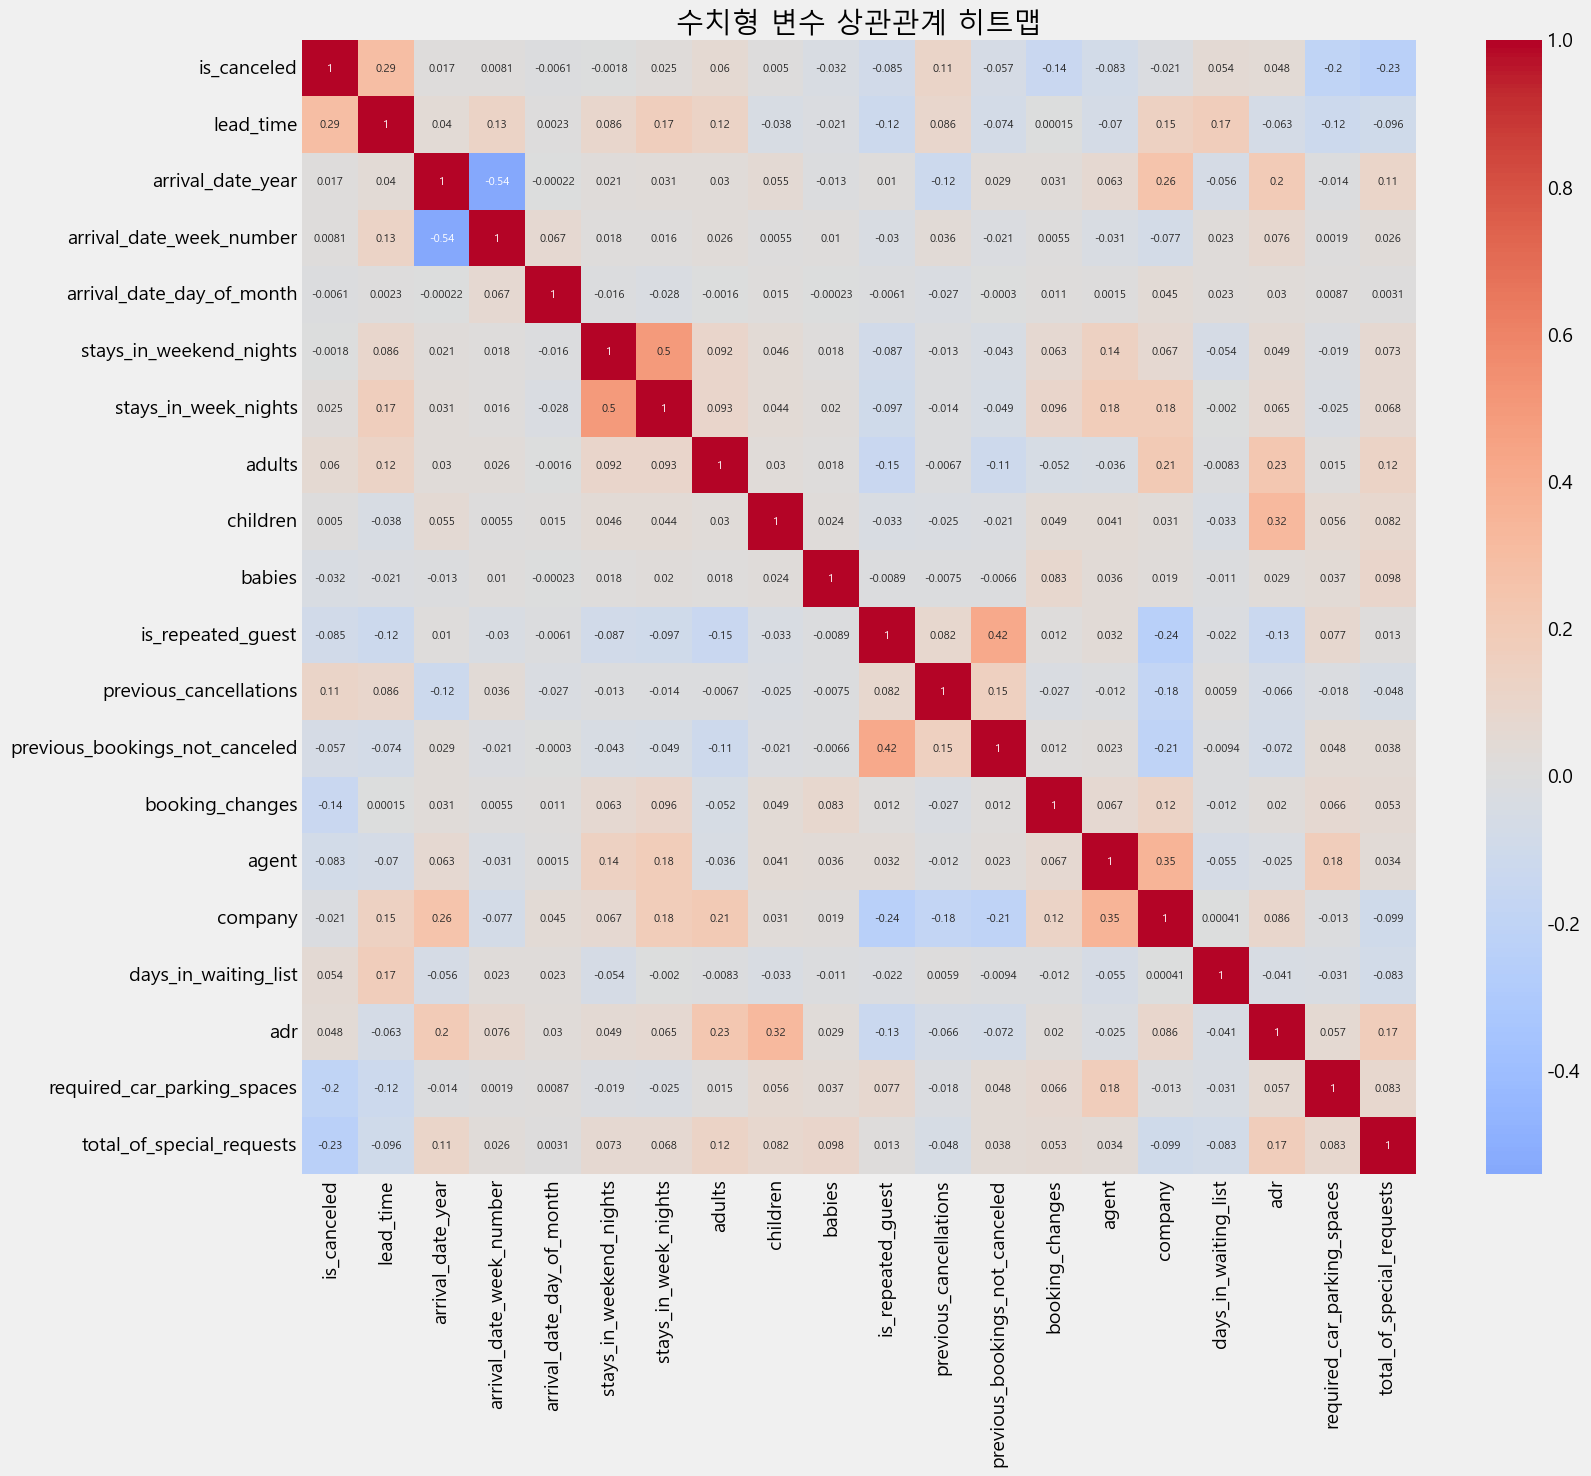

In [50]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàò
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 14))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, annot_kws={'size': 8})
plt.title('ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')

In [51]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§
corr_matrix = df[numeric_cols].corr()

# stackÏúºÎ°ú ÌéºÏπòÍ∏∞
corr_pairs = corr_matrix.stack()

# ÏûêÍ∏∞ ÏûêÏã†Í≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò(1.0) Ï†úÍ±∞ Î∞è Ï§ëÎ≥µ Ï†úÍ±∞
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]

# 0.02 Ïù¥ÏÉÅÏù∏ Í≤ÉÎßå ÌïÑÌÑ∞ÎßÅ
high_corr_pairs = corr_pairs[abs(corr_pairs) >= 0.02]

# DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†àÎåìÍ∞í Ïª¨Îüº Ï∂îÍ∞Ä
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Variable_1', 'Variable_2', 'Correlation']
high_corr_df['Abs_Correlation'] = abs(high_corr_df['Correlation'])

# Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)

print("ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.02 Ïù¥ÏÉÅÏù∏ Î≥ÄÏàò Ïåç (Ï†àÎåìÍ∞í ÌÅ∞ ÏàúÏÑú):")
print(high_corr_df)

ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.02 Ïù¥ÏÉÅÏù∏ Î≥ÄÏàò Ïåç (Ï†àÎåìÍ∞í ÌÅ∞ ÏàúÏÑú):
                   Variable_1                      Variable_2  Correlation  \
24   arrival_date_week_number               arrival_date_year    -0.540561   
37       stays_in_week_nights         stays_in_weekend_nights     0.498969   
73          is_repeated_guest  previous_bookings_not_canceled     0.418056   
100                     agent                         company     0.350746   
126                       adr                        children     0.324854   
..                        ...                             ...          ...   
57                   children  previous_bookings_not_canceled    -0.021072   
63                     babies                       lead_time    -0.020915   
27   arrival_date_week_number  previous_bookings_not_canceled    -0.020904   
104                   company                     is_canceled    -0.020642   
64                     babies            stays_in_week_nights     0.020191   



Text(0.5, 1.0, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.02 Ïù¥ÏÉÅÎßå ÌëúÏãúÌïú ÌûàÌä∏Îßµ')

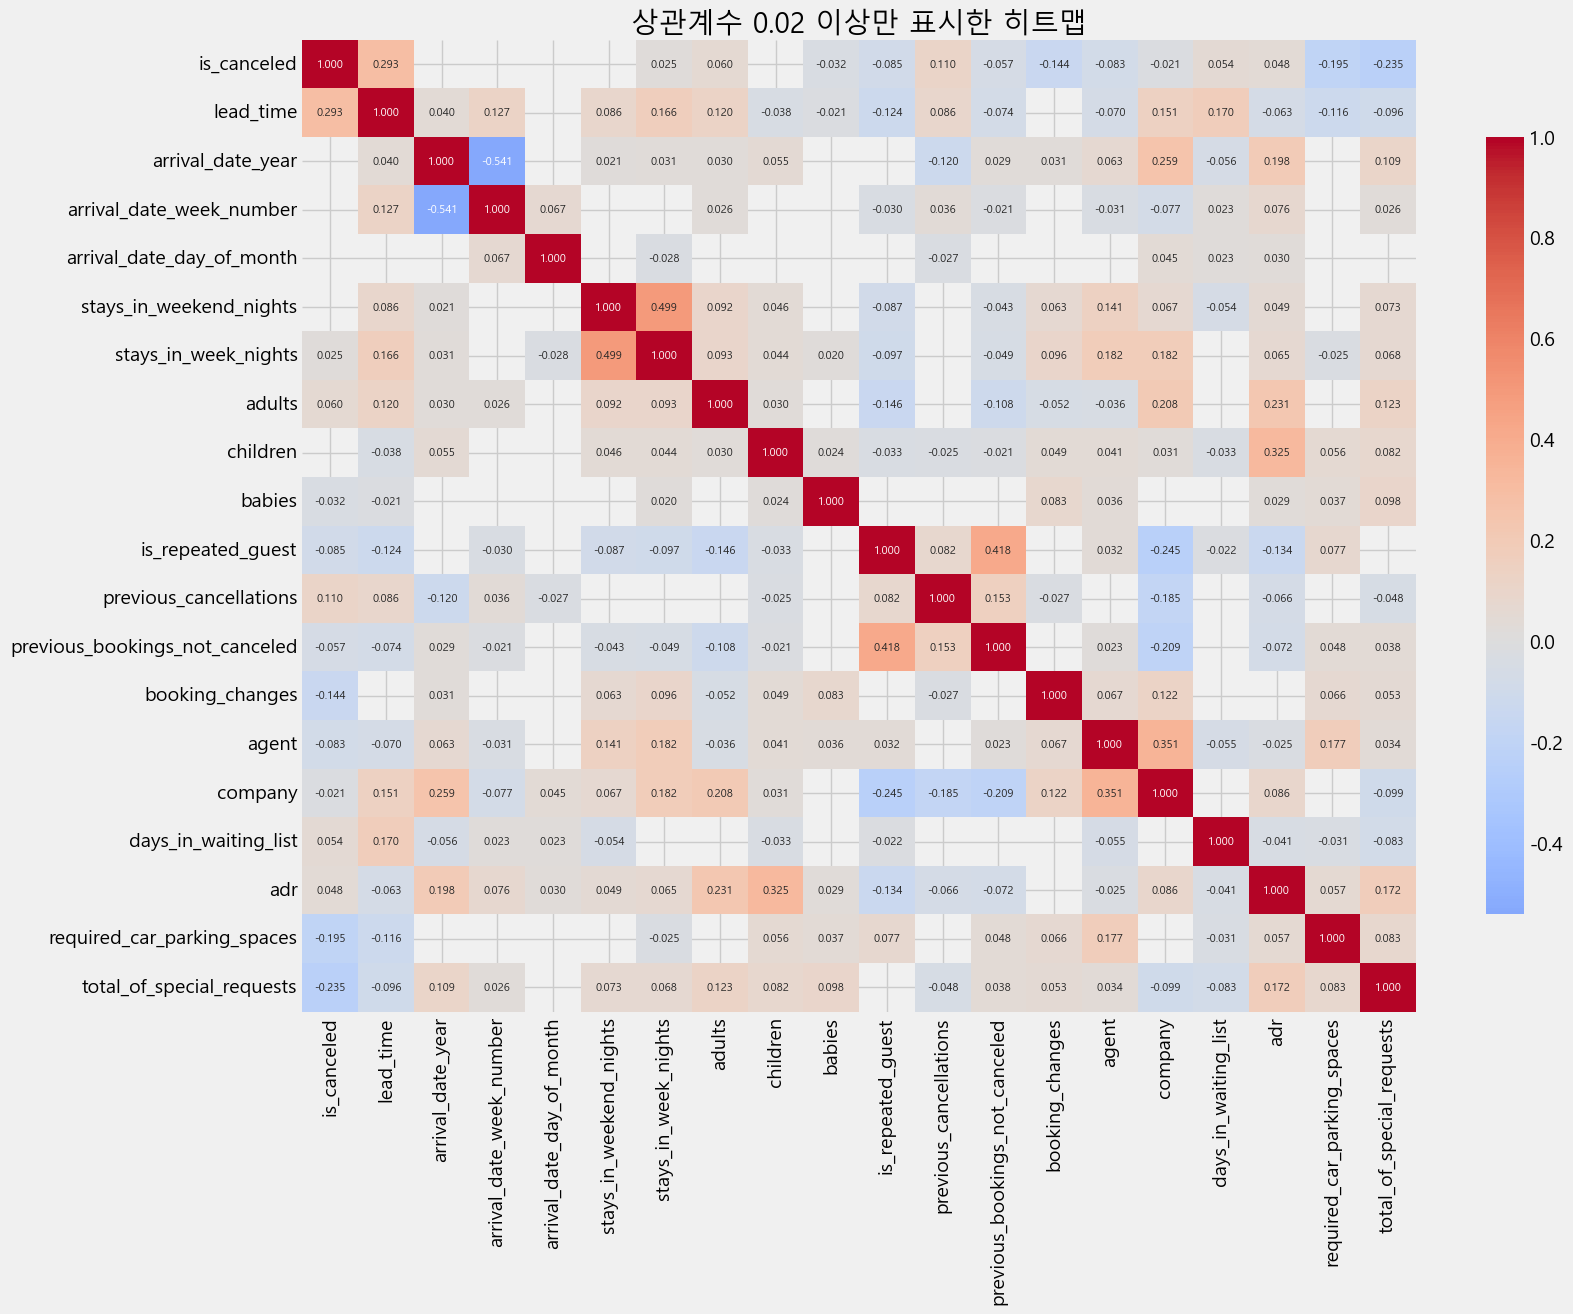

In [52]:
# 0.02 Ïù¥ÏÉÅÏù∏ Í≤ÉÎßå ÌëúÏãúÌïòÎäî ÎßàÏä§ÌÅ¨
corr_matrix = df[numeric_cols].corr()
mask = abs(corr_matrix) < 0.02

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            mask=mask,  # 0.02 ÎØ∏ÎßåÏùÄ ÌöåÏÉâÏúºÎ°ú
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            annot_kws={'size': 8},
            cbar_kws={'shrink': .8})
plt.title('ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.02 Ïù¥ÏÉÅÎßå ÌëúÏãúÌïú ÌûàÌä∏Îßµ')

In [53]:
# dataÌè¥ÎçîÏóê Ï†ÄÏû• (Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±)
import os
os.makedirs('results', exist_ok=True)

high_corr_df.to_csv('data/high_correlation_pairs.csv', 
                    index=False,
                    encoding='utf-8-sig')
print("CSV ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: data/high_correlation_pairs.csv")

CSV ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: data/high_correlation_pairs.csv


In [54]:
df[numeric_cols].head(10)

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   
5            0         14               2015                        27   
6            0          0               2015                        27   
7            0          9               2015                        27   
8            1         85               2015                        27   
9            1         75               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   
5                          1                        0                     2   
6                          1                        0                     2   
7                          1                        0                     2   
8                          1                        0                     3   
9                          1                        0                     3   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   
5       2       0.0       0                  0                       0   
6       2       0.0       0                  0                       0   
7       2       0.0       0                  0                       0   
8       2       0.0       0                  0                       0   
9       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    NaN      NaN   
1                               0                4    NaN      NaN   
2                               0                0    NaN      NaN   
3                               0                0  304.0      NaN   
4                               0                0  240.0      NaN   
5                               0                0  240.0      NaN   
6                               0                0    NaN      NaN   
7                               0                0  303.0      NaN   
8                               0                0  240.0      NaN   
9                               0                0   15.0      NaN   

   days_in_waiting_list    adr  required_car_parking_spaces  \
0                     0    0.0                            0   
1                     0    0.0                            0   
2                     0   75.0                            0   
3                     0   75.0                            0   
4                     0   98.0                            0   
5                     0   98.0                            0   
6                     0  107.0                            0   
7                     0  103.0                            0   
8                     0   82.0                            0   
9                     0  105.5                            0   

   total_of_special_requests  
0      

In [55]:
# Ï§ëÎ≥µ Ìñâ Ïàò - 11ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë Ï§ëÎ≥µ
df.duplicated().sum()

np.int64(31994)

In [56]:
# Î™©ÌëúÎ≥ÄÏàò - Í≤∞Ï∏°Ïπò ÏóÜÏùå
df['is_canceled'].isnull().sum()

np.int64(0)

In [57]:
# Î™©Ìëú Î≥ÄÏàò _ Î∂ÑÌè¨ - 37ÌçºÏÑºÌä∏ ÌôïÎ•†Î°ú Ï∫îÏä¨Îê®. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†ú Ï°¥Ïû¨.
df['is_canceled'].value_counts()/len(df)

is_canceled
0    0.629584
1    0.370416
Name: count, dtype: float64

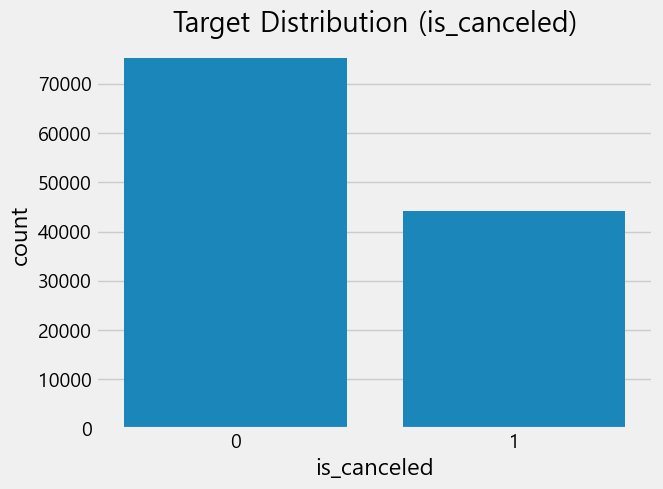

In [58]:
sns.countplot(data=df, x='is_canceled')
plt.title("Target Distribution (is_canceled)")
plt.show()

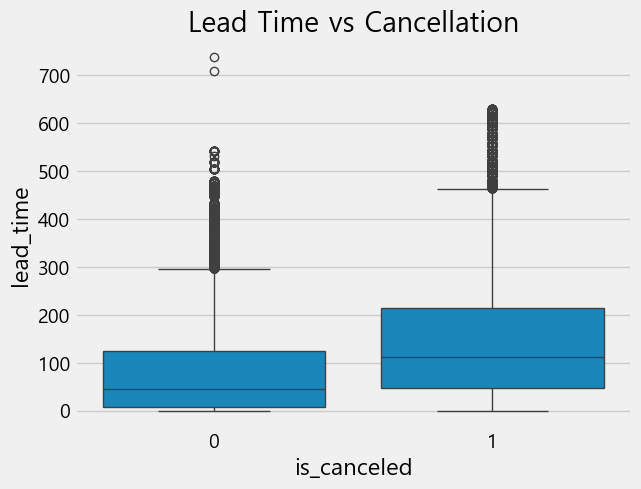

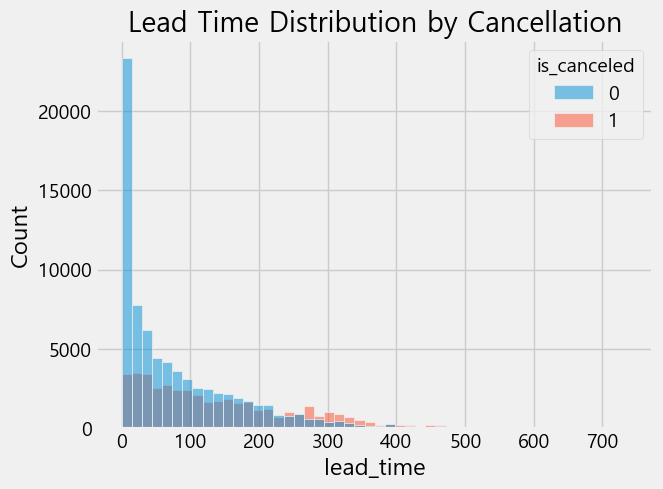

In [59]:
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Lead Time vs Cancellation")
plt.show()
# Î¶¨ÎìúÌÉÄÏûÑÏùò 700Ïùº Ïù¥ÏÉÅÏù∏ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌïÑÏöî

sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=False)
plt.title("Lead Time Distribution by Cancellation")
plt.show()

In [60]:
# Î≤îÏ£ºÌòï Ïª¨ÎüºÏùò ÎπÑÏú®
import numpy as np
# Î™®Îì† ÏàòÏπòÌòï Ï†úÏô∏
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Ïª¨ÎüºÎ™ÖÍ≥º Ïú†ÎãàÌÅ¨ Í∞úÏàòÎßå
print("=== Î≤îÏ£ºÌòï Î≥ÄÏàò Ïú†ÎãàÌÅ¨ Í∞úÏàò ===")
def print_categorical_cols():
    for col in categorical_cols:
        print(f"{col}, {df[col].dtype} : {df[col].unique()}")

print_categorical_cols()

=== Î≤îÏ£ºÌòï Î≥ÄÏàò Ïú†ÎãàÌÅ¨ Í∞úÏàò ===
hotel, object : ['Resort Hotel' 'City Hotel']
arrival_date_month, object : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal, object : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country, object : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 

In [61]:
# ÎÖ∏Ìä∏Î∂Å Îß® ÏúÑÏóê Ïù¥ ÏΩîÎìú Ï∂îÍ∞Ä
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

print("ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å! Ïù¥Ï†ú ÌïúÍ∏ÄÏù¥ Ï†ïÏÉÅ ÌëúÏãúÎê©ÎãàÎã§.")

ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å! Ïù¥Ï†ú ÌïúÍ∏ÄÏù¥ Ï†ïÏÉÅ ÌëúÏãúÎê©ÎãàÎã§.


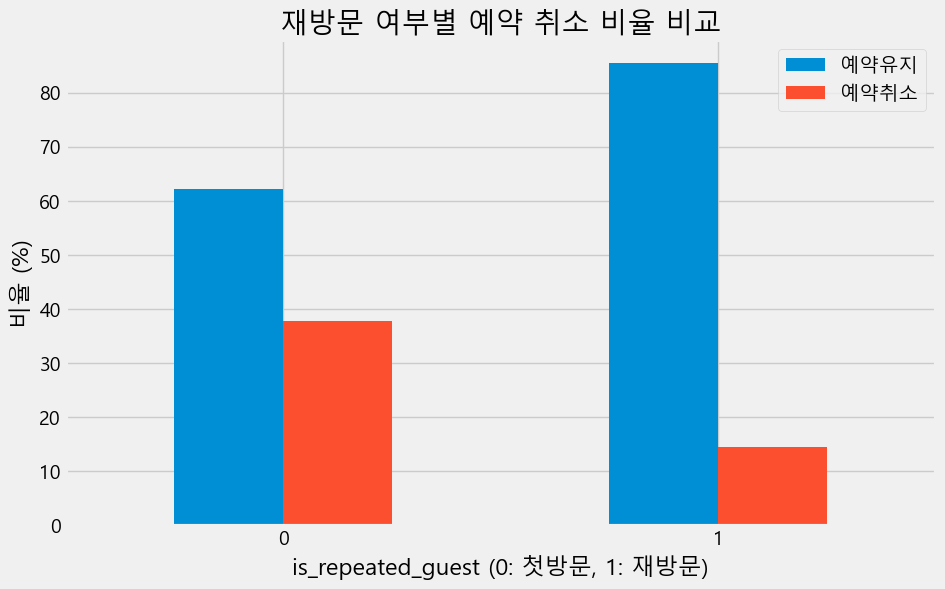

Ïû¨Î∞©Î¨∏ Ïó¨Î∂ÄÎ≥Ñ Ï∑®ÏÜå ÎπÑÏú®:
is_canceled                0          1
is_repeated_guest                      
0                  62.214916  37.785084
1                  85.511811  14.488189


In [62]:
# ÍµêÏ∞®Ìëú ÏÉùÏÑ± ÌõÑ ÎπÑÏú® Í≥ÑÏÇ∞
cross_tab = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize='index') * 100

# ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
cross_tab.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Ïû¨Î∞©Î¨∏ Ïó¨Î∂ÄÎ≥Ñ ÏòàÏïΩ Ï∑®ÏÜå ÎπÑÏú® ÎπÑÍµê')
plt.xlabel('is_repeated_guest (0: Ï≤´Î∞©Î¨∏, 1: Ïû¨Î∞©Î¨∏)')
plt.ylabel('ÎπÑÏú® (%)')
plt.legend(['ÏòàÏïΩÏú†ÏßÄ', 'ÏòàÏïΩÏ∑®ÏÜå'])
plt.xticks(rotation=0)
plt.show()

# ÏàòÏπòÎ°úÎèÑ ÌôïÏù∏
print("Ïû¨Î∞©Î¨∏ Ïó¨Î∂ÄÎ≥Ñ Ï∑®ÏÜå ÎπÑÏú®:")
print(cross_tab)

## Ïû¨Î∞©Î¨∏Ìïú Í≥†Í∞ùÏùºÏàòÎ°ù Ï∑®ÏÜåÏú®Ïù¥ ÎÇÆÎã§

üéØ Target Î∂ÑÌè¨:
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


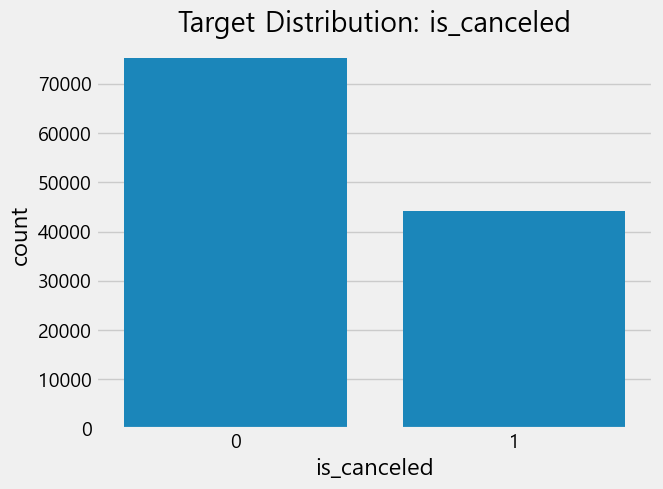


üìå hotel Î∂ÑÌè¨:
hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

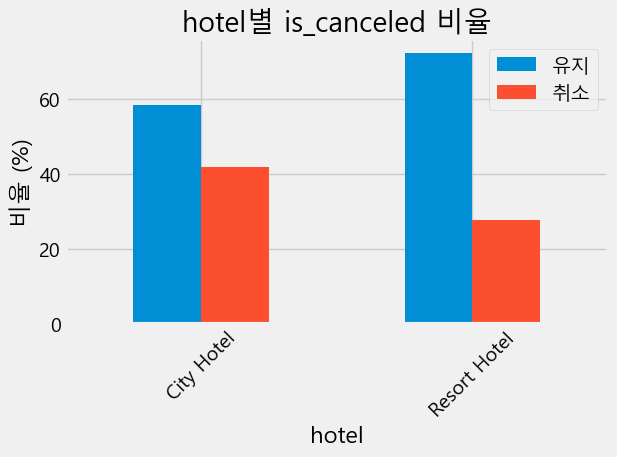

hotelÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled      0     1
hotel                   
City Hotel    58.3  41.7
Resort Hotel  72.2  27.8

üìå arrival_date_month Î∂ÑÌè¨:
arrival_date_month
August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

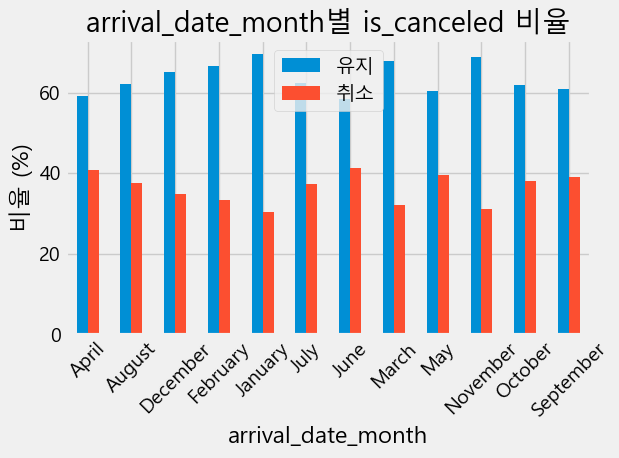

arrival_date_monthÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled            0     1
arrival_date_month            
April               59.2  40.8
August              62.2  37.8
December            65.0  35.0
February            66.6  33.4
January             69.5  30.5
July                62.5  37.5
June                58.5  41.5
March               67.8  32.2
May                 60.3  39.7
November            68.8  31.2
October             62.0  38.0
September           60.8  39.2

üìå meal Î∂ÑÌè¨:
meal
BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

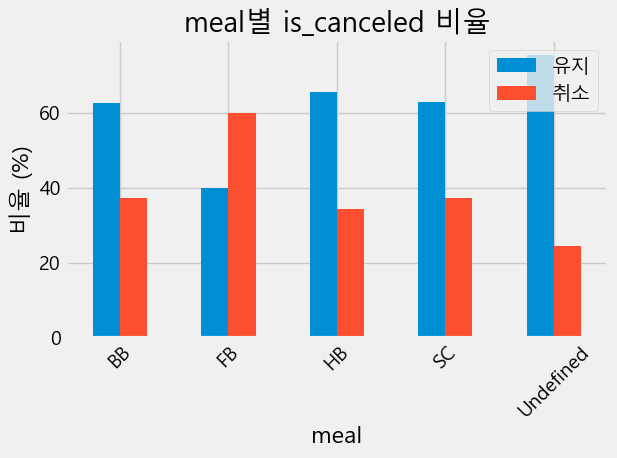

mealÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled     0     1
meal                   
BB           62.6  37.4
FB           40.1  59.9
HB           65.5  34.5
SC           62.8  37.2
Undefined    75.5  24.5

üìå country Î∂ÑÌè¨:
country
PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
         ...   
MRT    0.000008
KIR    0.000008
SDN    0.000008
ATF    0.000008
SLE    0.000008
Name: proportion, Length: 177, dtype: float64


<Figure size 1200x600 with 0 Axes>

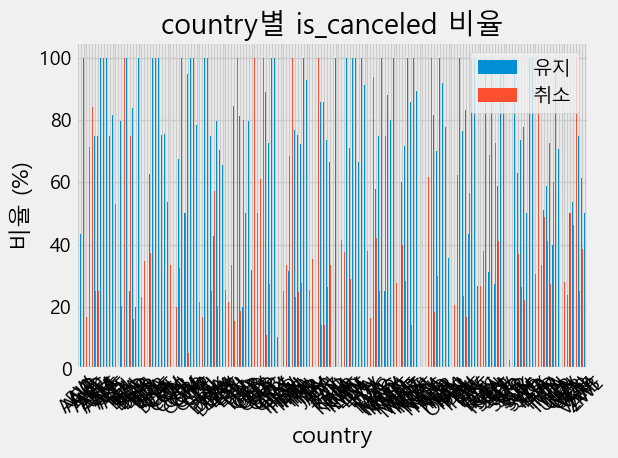

countryÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled      0      1
country                  
ABW          100.0    0.0
AGO           43.4   56.6
AIA          100.0    0.0
ALB           83.3   16.7
AND           28.6   71.4
...            ...    ...
VGB            0.0  100.0
VNM           75.0   25.0
ZAF           61.3   38.8
ZMB           50.0   50.0
ZWE           50.0   50.0

[177 rows x 2 columns]

üìå market_segment Î∂ÑÌè¨:
market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

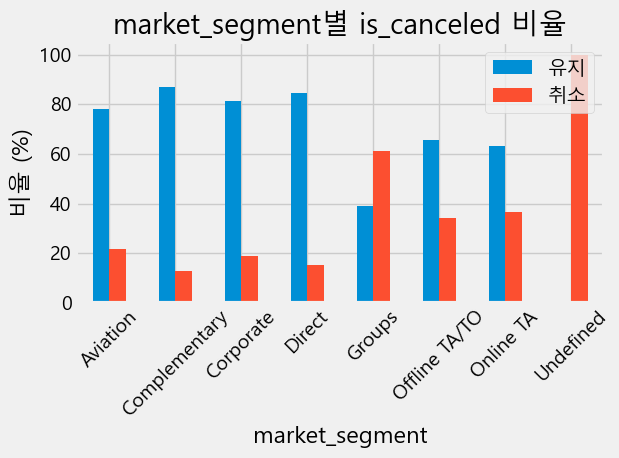

market_segmentÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled        0      1
market_segment             
Aviation        78.1   21.9
Complementary   86.9   13.1
Corporate       81.3   18.7
Direct          84.7   15.3
Groups          38.9   61.1
Offline TA/TO   65.7   34.3
Online TA       63.3   36.7
Undefined        0.0  100.0

üìå distribution_channel Î∂ÑÌè¨:
distribution_channel
TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

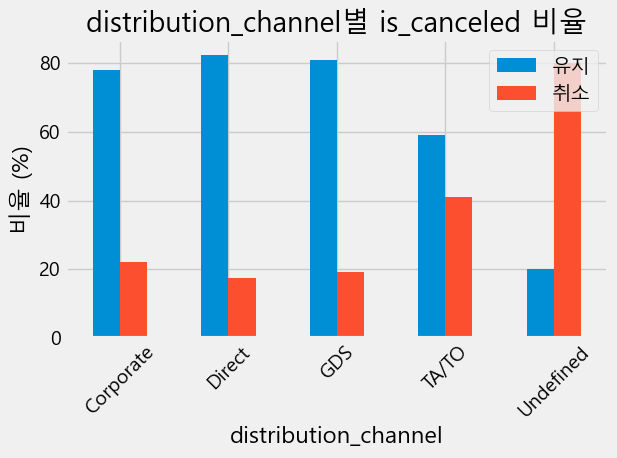

distribution_channelÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled              0     1
distribution_channel            
Corporate             77.9  22.1
Direct                82.5  17.5
GDS                   80.8  19.2
TA/TO                 59.0  41.0
Undefined             20.0  80.0

üìå reserved_room_type Î∂ÑÌè¨:
reserved_room_type
A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

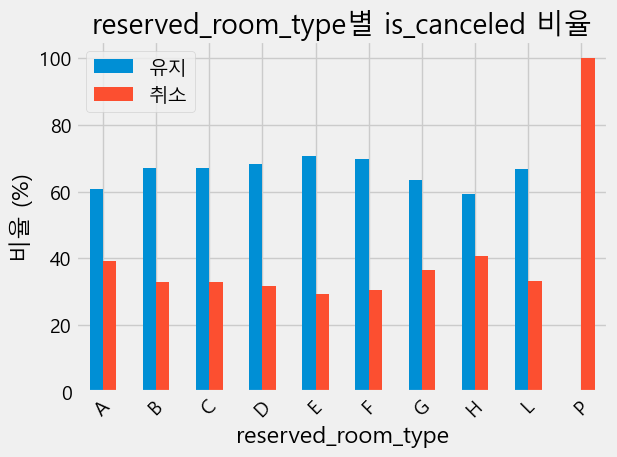

reserved_room_typeÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled            0      1
reserved_room_type             
A                   60.9   39.1
B                   67.1   32.9
C                   67.0   33.0
D                   68.2   31.8
E                   70.7   29.3
F                   69.6   30.4
G                   63.6   36.4
H                   59.2   40.8
L                   66.7   33.3
P                    0.0  100.0

üìå assigned_room_type Î∂ÑÌè¨:
assigned_room_type
A    0.620261
D    0.212095
E    0.065382
F    0.031418
G    0.021384
C    0.019893
B    0.018117
H    0.005964
I    0.003040
K    0.002337
P    0.000101
L    0.000008
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

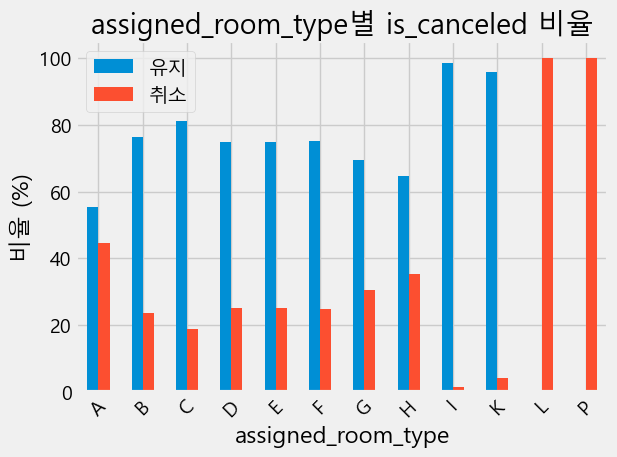

assigned_room_typeÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled            0      1
assigned_room_type             
A                   55.5   44.5
B                   76.3   23.7
C                   81.2   18.8
D                   74.9   25.1
E                   74.8   25.2
F                   75.3   24.7
G                   69.4   30.6
H                   64.7   35.3
I                   98.6    1.4
K                   95.7    4.3
L                    0.0  100.0
P                    0.0  100.0

üìå deposit_type Î∂ÑÌè¨:
deposit_type
No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

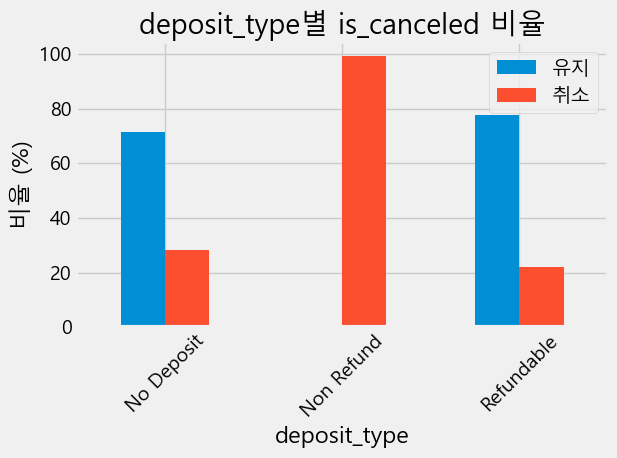

deposit_typeÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled      0     1
deposit_type            
No Deposit    71.6  28.4
Non Refund     0.6  99.4
Refundable    77.8  22.2

üìå customer_type Î∂ÑÌè¨:
customer_type
Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

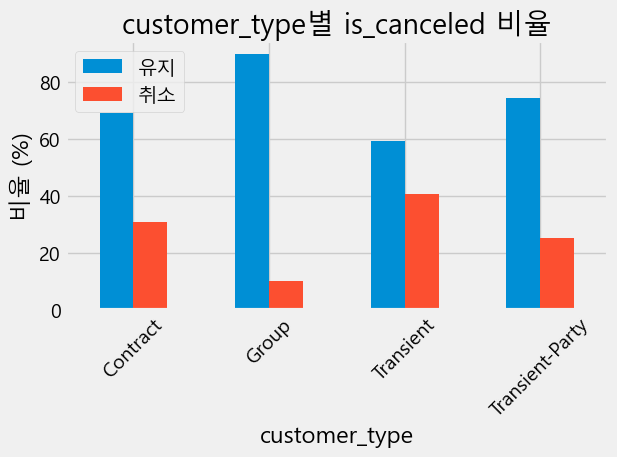

customer_typeÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled         0     1
customer_type              
Contract         69.0  31.0
Group            89.8  10.2
Transient        59.3  40.7
Transient-Party  74.6  25.4

üìå reservation_status Î∂ÑÌè¨:
reservation_status
Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

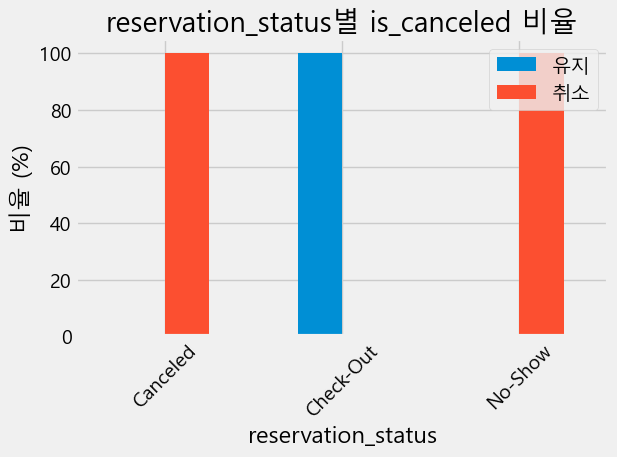

reservation_statusÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled             0      1
reservation_status              
Canceled              0.0  100.0
Check-Out           100.0    0.0
No-Show               0.0  100.0

üìå reservation_status_date Î∂ÑÌè¨:
reservation_status_date
2015-10-21    0.012237
2015-07-06    0.006743
2016-11-25    0.006617
2015-01-01    0.006391
2016-01-18    0.005235
                ...   
2015-02-26    0.000008
2015-03-18    0.000008
2015-03-12    0.000008
2015-03-11    0.000008
2015-06-14    0.000008
Name: proportion, Length: 926, dtype: float64


<Figure size 1200x600 with 0 Axes>

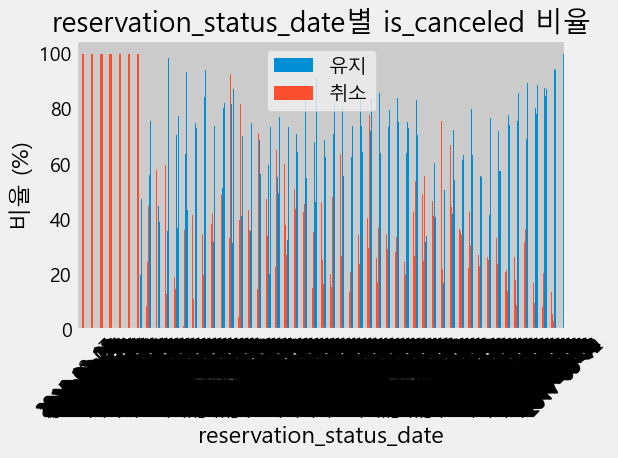

reservation_status_dateÎ≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:
is_canceled                  0      1
reservation_status_date              
2014-10-17                 0.0  100.0
2014-11-18                 0.0  100.0
2015-01-01                 0.0  100.0
2015-01-02                 0.0  100.0
2015-01-18                 0.0  100.0
...                        ...    ...
2017-09-08               100.0    0.0
2017-09-09               100.0    0.0
2017-09-10               100.0    0.0
2017-09-12               100.0    0.0
2017-09-14               100.0    0.0

[926 rows x 2 columns]


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def eda_target_report(df, target_col):
    """
    df: Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    target_col: ÌÉÄÍ≤ü Î≥ÄÏàòÎ™Ö (ex: 'is_canceled')
    """
    # Ïà´ÏûêÌòï / Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÎ¶¨
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col)
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # 1. ÌÉÄÍ≤ü Î∂ÑÌè¨
    print("üéØ Target Î∂ÑÌè¨:")
    print(df[target_col].value_counts(normalize=True))
    sns.countplot(data=df, x=target_col)
    plt.title(f"Target Distribution: {target_col}")
    plt.show()

    # # 2. Ïà´ÏûêÌòï Î≥ÄÏàò vs ÌÉÄÍ≤ü
    # for col in num_cols:
    #     fig, axes = plt.subplots(1, 2, figsize=(12,4))
        
    #     sns.boxplot(data=df, x=target_col, y=col, ax=axes[0])
    #     axes[0].set_title(f"{col} vs {target_col} (Boxplot)")

    #     sns.histplot(data=df, x=col, hue=target_col, bins=50, kde=False, ax=axes[1])
    #     axes[1].set_title(f"{col} Distribution by {target_col}")

    #     plt.tight_layout()
    #     plt.show()

# 3. Î≤îÏ£ºÌòï Î≥ÄÏàò vs ÌÉÄÍ≤ü
    for col in cat_cols:
        print(f"\nüìå {col} Î∂ÑÌè¨:")
        print(df[col].value_counts(normalize=True))
        
        # ÍµêÏ∞®ÌëúÎ°ú ÎπÑÏú® Í≥ÑÏÇ∞
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        
        # ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
        plt.figure(figsize=(12, 6))
        cross_tab.plot(kind='bar', stacked=False)
        plt.title(f'{col}Î≥Ñ {target_col} ÎπÑÏú®')
        plt.xlabel(col)
        plt.ylabel('ÎπÑÏú® (%)')
        plt.legend(['Ïú†ÏßÄ', 'Ï∑®ÏÜå'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # ÏàòÏπòÎ°úÎèÑ ÌôïÏù∏
        print(f"{col}Î≥Ñ Ï∑®ÏÜå/Ïú†ÏßÄ ÎπÑÏú®:")
        print(cross_tab.round(1))


# ======================================
# Ïã§Ï†ú Ïã§Ìñâ
eda_target_report(df, target_col='is_canceled')


# 3.Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ)
‚Üí Train/Test
-> ÌîºÏ≤ò. ÌÉÄÍ≤ü

In [64]:
# Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
df.drop_duplicates(inplace=True)
df.duplicated().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

(np.int64(0), None)

In [65]:
from sklearn.model_selection import train_test_split
df_targets = df['is_canceled']
df_features = df.drop(['is_canceled'], axis=1)

tr_x, te_x, tr_y, te_y = train_test_split(df_features,df_targets, test_size=0.3 )


In [66]:
tr_x.shape, te_x.shape, tr_y.shape, te_y.shape

((61177, 31), (26219, 31), (61177,), (26219,))

# 4.Train Îç∞Ïù¥ÌÑ∞Î°úÎßå ÏÉÅÏÑ∏ Î∂ÑÏÑù:
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï Í≤∞Ï†ï
- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ
- Ïä§ÏºÄÏùºÎßÅ ÌååÎùºÎØ∏ÌÑ∞ ÌïôÏäµ

In [67]:
# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
drop_cols = ['arrival_date_day_of_month','arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'country', 'reservation_status', 'reservation_status_date', 'hotel']
try:
    tr_x.drop(drop_cols, axis=1, inplace=True)
    te_x.drop(drop_cols, axis=1, inplace=True)
except:
    pass

tr_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61177 entries, 114530 to 17567
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61177 non-null  int64  
 1   stays_in_weekend_nights         61177 non-null  int64  
 2   stays_in_week_nights            61177 non-null  int64  
 3   adults                          61177 non-null  int64  
 4   children                        61175 non-null  float64
 5   babies                          61177 non-null  int64  
 6   meal                            61177 non-null  object 
 7   market_segment                  61177 non-null  object 
 8   distribution_channel            61177 non-null  object 
 9   is_repeated_guest               61177 non-null  int64  
 10  previous_cancellations          61177 non-null  int64  
 11  previous_bookings_not_canceled  61177 non-null  int64  
 12  reserved_room_type              

In [68]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ 
# - Í≤∞Ï∏°Ïπò ÏûàÎäî Ïª¨ÎüºÎ™Ö
null_cols = tr_x.columns[tr_x.isnull().sum() > 0]
null_cols

Index(['children', 'agent', 'company'], dtype='object')

In [69]:
#- Í≤∞Ï∏°Ïπò Ïª¨ÎüºÎ≥ÑÎ°ú ÌôïÏù∏
tr_x['company'].describe()

count    3651.000000
mean      182.363188
std       131.555541
min         6.000000
25%        46.000000
50%       169.000000
75%       263.000000
max       541.000000
Name: company, dtype: float64

In [70]:
fill_cols = ['children', 'company']
# 75%Ïùò ÏòàÏïΩÏûêÎì§Ïù¥ ÏïÑÏù¥Í∞Ä ÏóÜÎã§Í≥† ÎãµÌñàÏúºÎØÄÎ°ú ÏïÑÏù¥Ï†ïÎ≥¥ ÏóÜÏúºÎ©¥ ÏïÑÏù¥Í∞Ä ÏóÜÎã§Í≥† Í∞ÄÏ†ïÌïòÎäî Í≤ÉÏù¥ Ìï©Î¶¨Ï†ÅÏûÑ. Îî∞ÎùºÏÑú ÏµúÎπàÍ∞íÏúºÎ°ú Í≥†

# Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
tr_x['children'].fillna(0, inplace=True)
te_x['children'].fillna(0, inplace=True)

# ÌöåÏÇ¨Î•º ÌÜµÌï¥ ÏòàÏïΩÌïòÏßÄ ÏïäÏùÄ ÎπÑÏú®Ïù¥ 50%ÏØ§Ïù¥ÎØÄÎ°ú ÌöåÏÇ¨Î•º ÌÜµÌïòÏßÄ ÏïäÏùÄ ÏòàÏïΩ(Í≤∞Ï∏°Ïπò)ÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
tr_x['company'].fillna(0, inplace=True)
te_x['company'].fillna(0, inplace=True)

tr_x['agent'].fillna(0, inplace=True)
te_x['agent'].fillna(0, inplace=True)

tr_x.isnull().sum().sum(), te_x.isnull().sum().sum()

(np.int64(0), np.int64(0))

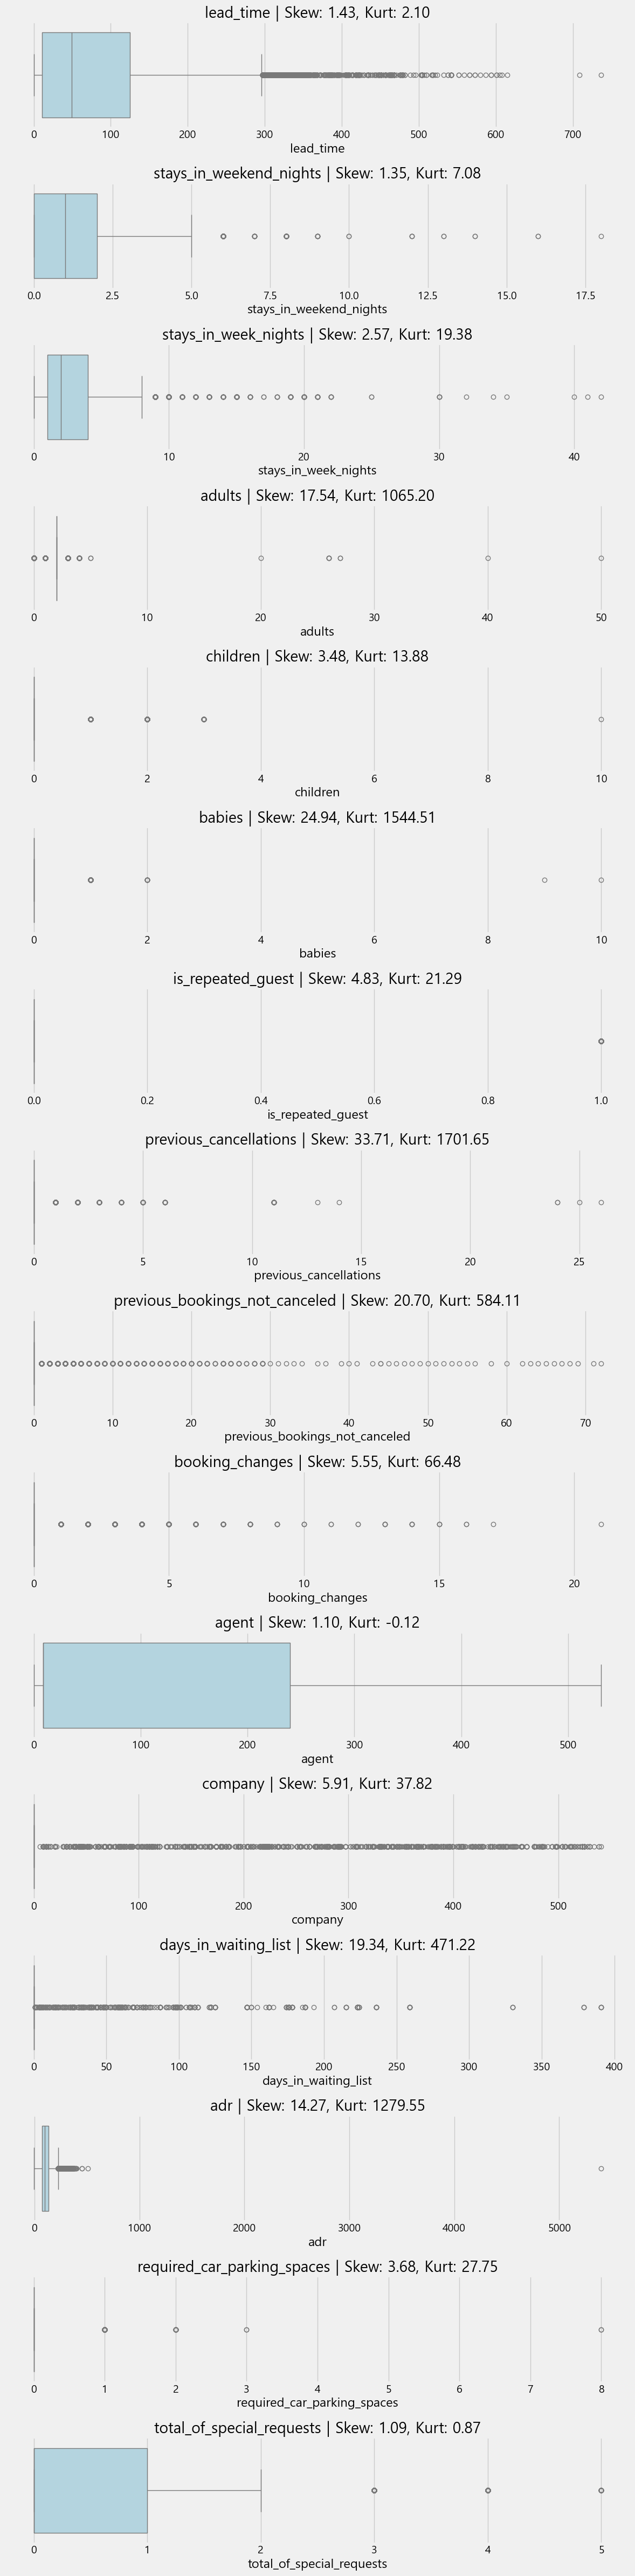

In [71]:
# ÏôúÎèÑ Ï≤®ÎèÑ Ï≤òÎ¶¨
## ÏôúÎèÑ Ï≤®ÎèÑ Ïó¨Î∂Ä ÌôïÏù∏

import seaborn as sns
import matplotlib.pyplot as plt

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
num_cols = tr_x.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    skew = tr_x[col].skew()
    kurt = tr_x[col].kurt()
    
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=tr_x[col], color="lightblue")
    plt.title(f"{col} | Skew: {skew:.2f}, Kurt: {kurt:.2f}")

plt.tight_layout()
plt.show()



### ÌîºÏ≤ò ÏÉùÏÑ±

In [72]:
# te_x[company]Ïùò Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥1 / ÏûëÏúºÎ©¥ 0
# company Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1, ÏïÑÎãàÎ©¥ 0  # .astype(int) : BooleanÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
te_x['has_company'] = (te_x['company'] > 0).astype(int)
tr_x['has_company'] = (tr_x['company'] > 0).astype(int)

# ÌôïÏù∏
print("has_company Î∂ÑÌè¨:")
print(tr_x['has_company'].value_counts()/len(tr_x['has_company']))

has_company Î∂ÑÌè¨:
has_company
0    0.940321
1    0.059679
Name: count, dtype: float64


In [73]:
# te_x[agent]Ïùò Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥1 / ÏûëÏúºÎ©¥ 0
# company Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1, ÏïÑÎãàÎ©¥ 0  # .astype(int) : BooleanÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
te_x['has_agent'] = (te_x['agent'] > 0).astype(int)
tr_x['has_agent'] = (tr_x['agent'] > 0).astype(int)

# ÌôïÏù∏
print("has_agent Î∂ÑÌè¨:")
print(tr_x['has_agent'].value_counts()/len(tr_x['has_agent']))

has_agent Î∂ÑÌè¨:
has_agent
1    0.8615
0    0.1385
Name: count, dtype: float64


In [74]:
# mealÏù¥ FBÏù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0Ïù∏ ÌîºÏ≤òÏÉùÏÑ±
import numpy as np

# np.whereÎ°ú Ï°∞Í±¥Î∂Ä Í∞í Ìï†Îãπ
tr_x['is_FB_meal'] = np.where(tr_x['meal'] == 'FB', 1, 0)
te_x['is_FB_meal'] = np.where(te_x['meal'] == 'FB', 1, 0)

# ÌôïÏù∏
print("is_FB_meal Î∂ÑÌè¨:")
print(tr_x['is_FB_meal'].value_counts()/len(tr_x['is_FB_meal']))

is_FB_meal Î∂ÑÌè¨:
is_FB_meal
0    0.996061
1    0.003939
Name: count, dtype: float64


In [75]:
# te_x['has_agent ', 'agent', 'company', 'meal'] Ïª¨Îüº Ï†úÍ±∞ÌïòÍ∏∞

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
drop_cols = ['has_agent ', 'agent', 'company', 'meal']
try:
    tr_x.drop(drop_cols, axis=1, inplace=True)
    te_x.drop(drop_cols, axis=1, inplace=True)
except:
    pass

tr_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61177 entries, 114530 to 17567
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61177 non-null  int64  
 1   stays_in_weekend_nights         61177 non-null  int64  
 2   stays_in_week_nights            61177 non-null  int64  
 3   adults                          61177 non-null  int64  
 4   children                        61177 non-null  float64
 5   babies                          61177 non-null  int64  
 6   meal                            61177 non-null  object 
 7   market_segment                  61177 non-null  object 
 8   distribution_channel            61177 non-null  object 
 9   is_repeated_guest               61177 non-null  int64  
 10  previous_cancellations          61177 non-null  int64  
 11  previous_bookings_not_canceled  61177 non-null  int64  
 12  reserved_room_type              

In [76]:
tr_x['market_segment'].unique()

array(['Online TA', 'Direct', 'Offline TA/TO', 'Groups', 'Corporate',
       'Complementary', 'Aviation'], dtype=object)

In [77]:
# Î¶¨Ïä§ÌÅ¨ Î†àÎ≤® Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
risk_mapping = {
    # High risk
    'Groups': 'High risk',
    'Online TA': 'High risk',
    
    # Medium risk  
    'Offline TA/TO': 'Medium risk',
    
    # Low risk
    'Direct': 'Low risk',
    'Corporate': 'Low risk',
    'Complementary': 'Low risk'
}

# ÏÉà ÌîºÏ≤ò ÏÉùÏÑ±
tr_x['market_risk_level'] = tr_x['market_segment'].map(risk_mapping)
te_x['market_risk_level'] = te_x['market_segment'].map(risk_mapping)

# Í≤∞Í≥º ÌôïÏù∏
print("market_risk_level Î∂ÑÌè¨:")
print(tr_x['market_risk_level'].value_counts()/len(tr_x['market_risk_level']))

# Îß§ÌïëÏù¥ Ï†úÎåÄÎ°ú ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print("\nÎß§Ìïë ÌôïÏù∏:")
mapping_check = tr_x.groupby('market_segment')['market_risk_level'].first()
print(mapping_check)

market_risk_level Î∂ÑÌè¨:
market_risk_level
High risk      0.649362
Low risk       0.189499
Medium risk    0.158556
Name: count, dtype: float64

Îß§Ìïë ÌôïÏù∏:
market_segment
Aviation                None
Complementary       Low risk
Corporate           Low risk
Direct              Low risk
Groups             High risk
Offline TA/TO    Medium risk
Online TA          High risk
Name: market_risk_level, dtype: object


In [78]:
# Îëê Ïª¨Îüº Í∞íÏù¥ Îã§Î•¥Î©¥ 1, Í∞ôÏúºÎ©¥ 0
tr_x['room_type_changed'] = (tr_x['reserved_room_type'] != tr_x['assigned_room_type']).astype(int)
te_x['room_type_changed'] = (te_x['reserved_room_type'] != te_x['assigned_room_type']).astype(int)

# Í≤∞Í≥º ÌôïÏù∏
print("room_type_changed Î∂ÑÌè¨:")
print(tr_x['room_type_changed'].value_counts()/len(tr_x['room_type_changed']))
print(f"Î∞© ÌÉÄÏûÖ Î≥ÄÍ≤ΩÎêú ÎπÑÏú®: {tr_x['room_type_changed'].mean()*100:.1f}%")

room_type_changed Î∂ÑÌè¨:
room_type_changed
0    0.849437
1    0.150563
Name: count, dtype: float64
Î∞© ÌÉÄÏûÖ Î≥ÄÍ≤ΩÎêú ÎπÑÏú®: 15.1%


In [79]:
# te_x[reserved_room_type, assigned_room_type ] Ïª¨Îüº Ï†úÍ±∞ÌïòÍ∏∞

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
drop_cols = ['reserved_room_type', 'assigned_room_type']
try:
    tr_x.drop(drop_cols, axis=1, inplace=True)
    te_x.drop(drop_cols, axis=1, inplace=True)
except:
    pass

tr_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61177 entries, 114530 to 17567
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61177 non-null  int64  
 1   stays_in_weekend_nights         61177 non-null  int64  
 2   stays_in_week_nights            61177 non-null  int64  
 3   adults                          61177 non-null  int64  
 4   children                        61177 non-null  float64
 5   babies                          61177 non-null  int64  
 6   meal                            61177 non-null  object 
 7   market_segment                  61177 non-null  object 
 8   distribution_channel            61177 non-null  object 
 9   is_repeated_guest               61177 non-null  int64  
 10  previous_cancellations          61177 non-null  int64  
 11  previous_bookings_not_canceled  61177 non-null  int64  
 12  booking_changes                 

ÏôúÎèÑÏ≤®ÎèÑ Ï≤òÎ¶¨

In [80]:
## |ÏôúÎèÑ| >= 1, Ï≤®ÎèÑ >= 2 ‚Üí Î°úÍ∑∏ Î≥ÄÌôò Í≥†Î†§.
import numpy as np
import pandas as pd

def log_transform_skew_kurt(tr_x, te_x, threshold_skew=1, threshold_kurt=2):
    """
    threshold_skew: ÏôúÎèÑ Í∏∞Ï§Ä (Í∏∞Î≥∏ 1)
    threshold_kurt: Ï≤®ÎèÑ Í∏∞Ï§Ä (Í∏∞Î≥∏ 2)

    return: (Î≥ÄÌôòÎêú DataFrame, Î≥ÄÌôòÎêú Ïª¨Îüº Î¶¨Ïä§Ìä∏)
    """
    num_cols = tr_x.select_dtypes(include=['int64','float64']).columns
    transformed_cols = []

    for col in num_cols:
        skew = tr_x[col].skew()
        kurt = tr_x[col].kurt()

        if abs(skew) >= threshold_skew or kurt >= threshold_kurt:
            # ÏùåÏàò/0 Í∞í Î∞©ÏßÄ ‚Üí log1p ÏÇ¨Ïö©
            tr_x[col + "_log"] = np.log1p(tr_x[col].clip(lower=0))
            te_x[col + "_log"] = np.log1p(tr_x[col].clip(lower=0))
            transformed_cols.append(col)

            print(f"üîÑ {col} Î≥ÄÌôòÎê® | Skew={skew:.2f}, Kurt={kurt:.2f}")

        else:
            print(f"‚è≠ {col} Í∑∏ÎåÄÎ°ú Îë† | Skew={skew:.2f}, Kurt={kurt:.2f}")

    return tr_x, te_x, transformed_cols


log_transform_skew_kurt(tr_x, te_x, threshold_skew=1, threshold_kurt=2)


üîÑ lead_time Î≥ÄÌôòÎê® | Skew=1.43, Kurt=2.10
üîÑ stays_in_weekend_nights Î≥ÄÌôòÎê® | Skew=1.35, Kurt=7.08
üîÑ stays_in_week_nights Î≥ÄÌôòÎê® | Skew=2.57, Kurt=19.38
üîÑ adults Î≥ÄÌôòÎê® | Skew=17.54, Kurt=1065.20
üîÑ children Î≥ÄÌôòÎê® | Skew=3.48, Kurt=13.88
üîÑ babies Î≥ÄÌôòÎê® | Skew=24.94, Kurt=1544.51
üîÑ is_repeated_guest Î≥ÄÌôòÎê® | Skew=4.83, Kurt=21.29
üîÑ previous_cancellations Î≥ÄÌôòÎê® | Skew=33.71, Kurt=1701.65
üîÑ previous_bookings_not_canceled Î≥ÄÌôòÎê® | Skew=20.70, Kurt=584.11
üîÑ booking_changes Î≥ÄÌôòÎê® | Skew=5.55, Kurt=66.48
üîÑ agent Î≥ÄÌôòÎê® | Skew=1.10, Kurt=-0.12
üîÑ company Î≥ÄÌôòÎê® | Skew=5.91, Kurt=37.82
üîÑ days_in_waiting_list Î≥ÄÌôòÎê® | Skew=19.34, Kurt=471.22
üîÑ adr Î≥ÄÌôòÎê® | Skew=14.27, Kurt=1279.55
üîÑ required_car_parking_spaces Î≥ÄÌôòÎê® | Skew=3.68, Kurt=27.75
üîÑ total_of_special_requests Î≥ÄÌôòÎê® | Skew=1.09, Kurt=0.87
üîÑ has_company Î≥ÄÌôòÎê® | Skew=3.72, Kurt=11.82
üîÑ has_agent Î≥ÄÌôòÎê® | Skew=-2.09, Kurt=2.38
üîÑ

(        lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  \
 114530         45                        1                     3       2   
 107334          2                        0                     2       3   
 2114            0                        0                     2       2   
 70030         332                        1                     3       2   
 19628           0                        1                     0       1   
 ...           ...                      ...                   ...     ...   
 39403         226                        2                     4       2   
 76812           2                        0                     1       1   
 95397           4                        0                     1       1   
 25838         196                        2                     3       2   
 17567          49                        3                     7       2   
 
         children  babies       meal market_segment distribution_channel  

Ïù∏ÏΩîÎî©
- ÏõêÌï´Ïù∏ÏΩîÎî© ÏÇ¨Ïö©ÏãúÏóêÎäî Ïù∏ÏΩîÎî©Îêú Í≤ÉÏùÑ Ïô∏ÎèÑÏ≤®ÎèÑ Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏùå. 

In [81]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)

enco_tr = pd.DataFrame()
enco_tr

Empty DataFrame
Columns: []
Index: []

In [82]:
# Ìïú Ï§ÑÎ°ú ÌôïÏù∏
print(f"ÎπÑÏàòÏπòÌòï Ïª¨Îüº {tr_x.select_dtypes(exclude=[np.number]).columns}")

ÎπÑÏàòÏπòÌòï Ïª¨Îüº Index(['meal', 'market_segment', 'distribution_channel', 'deposit_type',
       'customer_type', 'market_risk_level'],
      dtype='object')


In [83]:
tr_x.select_dtypes(exclude=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 61177 entries, 114530 to 17567
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   meal                  61177 non-null  object
 1   market_segment        61177 non-null  object
 2   distribution_channel  61177 non-null  object
 3   deposit_type          61177 non-null  object
 4   customer_type         61177 non-null  object
 5   market_risk_level     61019 non-null  object
dtypes: object(6)
memory usage: 5.3+ MB


In [84]:
# dtype : Ïò§Î∏åÏ†ùÌä∏->Ïπ¥ÌÖåÍ≥†Î¶¨ for Î©îÎ™®Î¶¨Ï†àÏïΩ ÏúÑÌï¥

import pandas as pd
import numpy as np

print("=== Category ÌÉÄÏûÖ Î≥ÄÌôò ÏãúÏûë ===")

# 1Îã®Í≥Ñ: ÌòÑÏû¨ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï∏°Ï†ï
def get_memory_usage(df, name):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Í≥ÑÏÇ∞"""
    memory_mb = df.memory_usage(deep=True).sum() / 1024 / 1024
    return memory_mb

# Î≥ÄÌôò Ï†Ñ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ
tr_memory_before = get_memory_usage(tr_x, "Train")
te_memory_before = get_memory_usage(te_x, "Test")
total_before = tr_memory_before + te_memory_before

print(f"üìä Î≥ÄÌôò Ï†Ñ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ:")
print(f"   - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:  {tr_memory_before:.1f} MB")
print(f"   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {te_memory_before:.1f} MB")
print(f"   - Ï¥ùÌï©:        {total_before:.1f} MB")

# 2Îã®Í≥Ñ: Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ Î∞è Î∂ÑÏÑù
categorical_cols = tr_x.select_dtypes(include=['object']).columns.tolist()
print(f"\nüîç Î≤îÏ£ºÌòï Ïª¨Îüº Î∂ÑÏÑù ({len(categorical_cols)}Í∞ú):")

conversion_candidates = []
for col in categorical_cols:
    unique_count = tr_x[col].nunique()
    total_count = len(tr_x)
    cardinality_ratio = unique_count / total_count
    
    # Î©îÎ™®Î¶¨ Ï†àÏïΩ Ìö®Í≥º ÏòàÏÉÅ
    if cardinality_ratio < 0.1:
        benefit = "ÎÜíÏùå (70-90% Ï†àÏïΩ)"
        recommend = "‚úÖ Í∞ïÎ†• Í∂åÏû•"
        conversion_candidates.append(col)
    elif cardinality_ratio < 0.3:
        benefit = "Î≥¥ÌÜµ (30-70% Ï†àÏïΩ)"
        recommend = "‚ö†Ô∏è Í∂åÏû•"
        conversion_candidates.append(col)
    elif cardinality_ratio < 0.7:
        benefit = "ÎÇÆÏùå (10-30% Ï†àÏïΩ)"
        recommend = "‚ñ≥ ÏÑ†ÌÉùÏ†Å"
    else:
        benefit = "Îß§Ïö∞ ÎÇÆÏùå (< 10%)"
        recommend = "‚ùå ÎπÑÍ∂åÏû•"
    
    print(f"   {col:<25}: {unique_count:3d}Í∞ú ({cardinality_ratio:.1%}) ‚Üí {recommend}")
    print(f"      ÏòàÏÉÅ Ï†àÏïΩ: {benefit}")

print(f"\nüìã Î≥ÄÌôò ÎåÄÏÉÅ Ïª¨Îüº: {len(conversion_candidates)}Í∞ú")
for i, col in enumerate(conversion_candidates, 1):
    print(f"   {i}. {col}")

# 3Îã®Í≥Ñ: Category ÌÉÄÏûÖ Î≥ÄÌôò Ïã§Ìñâ
print(f"\nüîÑ Category ÌÉÄÏûÖ Î≥ÄÌôò ÏßÑÌñâ...")

# Í∞Å Ïª¨ÎüºÎ≥Ñ Î≥ÄÌôò Î∞è Î©îÎ™®Î¶¨ Ï†àÏïΩ Ìö®Í≥º Ï∏°Ï†ï
conversion_results = []

for col in conversion_candidates:
    # Î≥ÄÌôò Ï†Ñ Î©îÎ™®Î¶¨
    before_memory = tr_x[col].memory_usage(deep=True)
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÏùò ÌõÑ Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
    categories = tr_x[col].unique()
    
    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎèôÏùºÌïú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ÅÏö©
    tr_x[col] = pd.Categorical(tr_x[col], categories=categories)
    te_x[col] = pd.Categorical(te_x[col], categories=categories)
    
    # Î≥ÄÌôò ÌõÑ Î©îÎ™®Î¶¨
    after_memory = tr_x[col].memory_usage(deep=True)
    savings_percent = (1 - after_memory / before_memory) * 100
    
    conversion_results.append({
        'column': col,
        'before_kb': before_memory / 1024,
        'after_kb': after_memory / 1024,
        'savings_percent': savings_percent
    })
    
    print(f"   ‚úÖ {col:<25}: {savings_percent:5.1f}% Ï†àÏïΩ")

# 4Îã®Í≥Ñ: Ï†ÑÏ≤¥ Î©îÎ™®Î¶¨ Ï†àÏïΩ Ìö®Í≥º ÌôïÏù∏
tr_memory_after = get_memory_usage(tr_x, "Train")
te_memory_after = get_memory_usage(te_x, "Test")
total_after = tr_memory_after + te_memory_after

print(f"\nüìä Î≥ÄÌôò ÌõÑ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ:")
print(f"   - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:  {tr_memory_after:.1f} MB (Ïù¥Ï†Ñ: {tr_memory_before:.1f} MB)")
print(f"   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {te_memory_after:.1f} MB (Ïù¥Ï†Ñ: {te_memory_before:.1f} MB)")
print(f"   - Ï¥ùÌï©:        {total_after:.1f} MB (Ïù¥Ï†Ñ: {total_before:.1f} MB)")

# 5Îã®Í≥Ñ: Ï¥ù Ï†àÏïΩ Ìö®Í≥º Í≥ÑÏÇ∞
total_savings_mb = total_before - total_after
total_savings_percent = (total_savings_mb / total_before) * 100

print(f"\nüéâ Ï¥ù Î©îÎ™®Î¶¨ Ï†àÏïΩ Ìö®Í≥º:")
print(f"   - Ï†àÏïΩÎüâ:      {total_savings_mb:.1f} MB")
print(f"   - Ï†àÏïΩÎ•†:      {total_savings_percent:.1f}%")

if total_savings_percent > 20:
    print(f"   ‚úÖ ÌõåÎ•≠Ìïú Î©îÎ™®Î¶¨ ÏµúÏ†ÅÌôî!")
elif total_savings_percent > 10:
    print(f"   üëç Ï¢ãÏùÄ Î©îÎ™®Î¶¨ Ï†àÏïΩ!")
else:
    print(f"   ‚ö†Ô∏è Ï†úÌïúÏ†ÅÏù∏ Ï†àÏïΩ Ìö®Í≥º")

# 6Îã®Í≥Ñ: Î≥ÄÌôò Í≤∞Í≥º ÏÉÅÏÑ∏ Î∂ÑÏÑù
print(f"\nüìã Ïª¨ÎüºÎ≥Ñ Î≥ÄÌôò Í≤∞Í≥º ÏÉÅÏÑ∏:")
print(f"{'Ïª¨ÎüºÎ™Ö':<25} {'Î≥ÄÌôòÏ†Ñ(KB)':<12} {'Î≥ÄÌôòÌõÑ(KB)':<12} {'Ï†àÏïΩÎ•†(%)':<10}")
print("-" * 65)

for result in conversion_results:
    print(f"{result['column']:<25} {result['before_kb']:>10.1f} {result['after_kb']:>10.1f} {result['savings_percent']:>8.1f}%")

# 7Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print(f"\nüîç Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∂ÑÌè¨:")
dtype_counts = tr_x.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   - {dtype}: {count}Í∞ú Ïª¨Îüº")

# 8Îã®Í≥Ñ: Category ÌÉÄÏûÖ ÏÜçÏÑ± ÌôïÏù∏
print(f"\nüìä Category ÌÉÄÏûÖ ÏÜçÏÑ± ÌôïÏù∏ (Ï≤´ Î≤àÏß∏ Î≥ÄÌôò Ïª¨Îüº):")
if conversion_candidates:
    sample_col = conversion_candidates[0]
    sample_cat = tr_x[sample_col]
    
    print(f"Ïª¨Îüº: {sample_col}")
    print(f"   - Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {sample_cat.dtype}")
    print(f"   - Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò: {len(sample_cat.cat.categories)}")
    print(f"   - Ïπ¥ÌÖåÍ≥†Î¶¨Îì§: {sample_cat.cat.categories.tolist()[:10]}")  # Ï≤òÏùå 10Í∞úÎßå
    if len(sample_cat.cat.categories) > 10:
        print(f"     ... Î∞è {len(sample_cat.cat.categories)-10}Í∞ú Îçî")
    
    print(f"   - ÏàúÏÑú Ïó¨Î∂Ä: {sample_cat.cat.ordered}")
    print(f"   - ÏÉòÌîå Í∞í: {sample_cat.head(5).tolist()}")
    print(f"   - ÎÇ¥Î∂Ä ÏΩîÎìú: {sample_cat.cat.codes.head(5).tolist()}")

# 9Îã®Í≥Ñ: Í≤ÄÏ¶ù - Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± Í≤ÄÏ¶ù:")
consistency_check = True

for col in conversion_candidates:
    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÎèôÏùºÌïúÏßÄ ÌôïÏù∏
    tr_cats = set(tr_x[col].cat.categories)
    te_cats = set(te_x[col].cat.categories)
    
    if tr_cats == te_cats:
        print(f"   ‚úÖ {col}: Ïπ¥ÌÖåÍ≥†Î¶¨ ÏùºÍ¥ÄÏÑ± OK")
    else:
        print(f"   ‚ùå {col}: Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂àÏùºÏπò!")
        consistency_check = False

if consistency_check:
    print(f"   üéâ Î™®Îì† Ïª¨ÎüºÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏùºÍ¥ÄÏÑ± ÏûàÍ≤å Î≥ÄÌôòÎê®!")
else:
    print(f"   ‚ö†Ô∏è ÏùºÎ∂Ä Ïª¨ÎüºÏóêÏÑú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂àÏùºÏπò Î∞úÏÉù")

print(f"\n" + "="*60)
print(f"üéâ Category ÌÉÄÏûÖ Î≥ÄÌôò ÏôÑÎ£å!")
print(f"üíæ Ï¥ù {total_savings_mb:.1f} MB ({total_savings_percent:.1f}%) Î©îÎ™®Î¶¨ Ï†àÏïΩ!")
print(f"üöÄ Ïù¥Ï†ú Îçî Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§!")

=== Category ÌÉÄÏûÖ Î≥ÄÌôò ÏãúÏûë ===
üìä Î≥ÄÌôò Ï†Ñ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ:
   - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:  40.9 MB
   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 16.7 MB
   - Ï¥ùÌï©:        57.6 MB

üîç Î≤îÏ£ºÌòï Ïª¨Îüº Î∂ÑÏÑù (6Í∞ú):
   meal                     :   5Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)
   market_segment           :   7Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)
   distribution_channel     :   5Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)
   deposit_type             :   3Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)
   customer_type            :   4Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)
   market_risk_level        :   3Í∞ú (0.0%) ‚Üí ‚úÖ Í∞ïÎ†• Í∂åÏû•
      ÏòàÏÉÅ Ï†àÏïΩ: ÎÜíÏùå (70-90% Ï†àÏïΩ)

üìã Î≥ÄÌôò ÎåÄÏÉÅ Ïª¨Îüº: 6Í∞ú
   1. meal
   2. market_segment
   3. distribution_channel
   4. deposit_type
   5. customer_type
  

ValueError: Categorical categories cannot be null

In [86]:
print("=== Ïù∏ÏΩîÎî© Ï§ÄÎπÑ ÏÉÅÌÉú ===")

# Category ÌÉÄÏûÖ Ïª¨Îüº ÌôïÏù∏
category_cols = tr_x.select_dtypes(include=['category']).columns.tolist()
object_cols = tr_x.select_dtypes(include=['object']).columns.tolist()

print(f"Category ÌÉÄÏûÖ: {len(category_cols)}Í∞ú")
print(f"Object ÌÉÄÏûÖ:   {len(object_cols)}Í∞ú")

print(f"\n‚úÖ Category Î≥ÄÌôò ÏôÑÎ£å! Ïù¥Ï†ú ÏõêÌï´Ïù∏ÏΩîÎî©ÏùÑ Îçî Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïã§ÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§!")

=== Ïù∏ÏΩîÎî© Ï§ÄÎπÑ ÏÉÅÌÉú ===
Category ÌÉÄÏûÖ: 5Í∞ú
Object ÌÉÄÏûÖ:   1Í∞ú

‚úÖ Category Î≥ÄÌôò ÏôÑÎ£å! Ïù¥Ï†ú ÏõêÌï´Ïù∏ÏΩîÎî©ÏùÑ Îçî Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïã§ÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§!


In [87]:
tr_x.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 61177 entries, 114530 to 17567
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   market_risk_level  61019 non-null  object
dtypes: object(1)
memory usage: 2.9+ MB


In [88]:
import category_encoders as ce
import pandas as pd

# 1Îã®Í≥Ñ: Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ
print("=== Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ ===")
categorical_cols = tr_x.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Î≤îÏ£ºÌòï Ïª¨Îüº ({len(categorical_cols)}Í∞ú):")
for i, col in enumerate(categorical_cols, 1):
    unique_count = tr_x[col].nunique()
    print(f"{i:2d}. {col:<25} : {unique_count:3d}Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨")

print(f"\nÏ¥ù Î≤îÏ£ºÌòï Ïª¨Îüº: {len(categorical_cols)}Í∞ú")
print("="*60)

# 2Îã®Í≥Ñ: OneHot Encoder ÏÑ§Ï†ï
encoder = ce.OneHotEncoder(
    cols=categorical_cols,        # Ïù∏ÏΩîÎî©Ìï† Ïª¨ÎüºÎì§
    use_cat_names=True,          # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ ÏÇ¨Ïö©
    drop_invariant=False          # Î≥ÄÌôîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
)

# 3Îã®Í≥Ñ: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú fit & transform
print("\n=== ÏõêÌï´Ïù∏ÏΩîÎî© ÏßÑÌñâ ===")
print("üîÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï§ë...")
tr_x_encoded = encoder.fit_transform(tr_x)

print("üîÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï§ë...")
te_x_encoded = encoder.transform(te_x)

# 4Îã®Í≥Ñ: Í≤∞Í≥º ÌôïÏù∏
print("\n=== Ïù∏ÏΩîÎî© Í≤∞Í≥º ===")
print(f"üìä ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:")
print(f"   - ÌïôÏäµ: {tr_x.shape}")
print(f"   - ÌÖåÏä§Ìä∏: {te_x.shape}")

print(f"\nüìä Ïù∏ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:")
print(f"   - ÌïôÏäµ: {tr_x_encoded.shape}")
print(f"   - ÌÖåÏä§Ìä∏: {te_x_encoded.shape}")

print(f"\nüìà Ïª¨Îüº Ïàò Î≥ÄÌôî:")
print(f"   - ÏõêÎ≥∏: {tr_x.shape[1]}Í∞ú ‚Üí Ïù∏ÏΩîÎî© ÌõÑ: {tr_x_encoded.shape[1]}Í∞ú")
print(f"   - Ï¶ùÍ∞Ä: +{tr_x_encoded.shape[1] - tr_x.shape[1]}Í∞ú Ïª¨Îüº")

# 5Îã®Í≥Ñ: ÏÉàÎ°ú ÏÉùÏÑ±Îêú Ïª¨ÎüºÎì§ ÌôïÏù∏
print("\n=== ÏÉàÎ°ú ÏÉùÏÑ±Îêú Ïª¨ÎüºÎì§ (Ï≤òÏùå 20Í∞ú) ===")
original_cols = set(tr_x.select_dtypes(exclude=['object']).columns)
new_cols = [col for col in tr_x_encoded.columns if col not in original_cols]

print(f"ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº: {len(new_cols)}Í∞ú")
for i, col in enumerate(new_cols[:20], 1):
    print(f"{i:2d}. {col}")

if len(new_cols) > 20:
    print(f"... Î∞è {len(new_cols)-20}Í∞ú Îçî")

# 6Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print(f"\n=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ ===")
print("Ïù∏ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:")
dtype_counts = tr_x_encoded.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   - {dtype}: {count}Í∞ú Ïª¨Îüº")

# 7Îã®Í≥Ñ: Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ ÌôïÏù∏
print(f"\n=== Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ ===")
tr_memory_mb = tr_x_encoded.memory_usage(deep=True).sum() / 1024 / 1024
te_memory_mb = te_x_encoded.memory_usage(deep=True).sum() / 1024 / 1024

print(f"   - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: {tr_memory_mb:.1f} MB")
print(f"   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {te_memory_mb:.1f} MB")
print(f"   - Ï¥ù Î©îÎ™®Î¶¨: {tr_memory_mb + te_memory_mb:.1f} MB")

# 8Îã®Í≥Ñ: ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"\n=== ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞ ===")
print("ÏõêÌï´Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ (Ï≤òÏùå 5Ìñâ, Ï≤òÏùå 10Ïª¨Îüº):")
print(tr_x_encoded.iloc[:5, :10])

print(f"\n‚úÖ Î™®Îì† Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÏõêÌï´Ïù∏ÏΩîÎî© ÏôÑÎ£å!")
print(f"üìù Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞Îäî tr_x_encoded, te_x_encodedÏóê Ï†ÄÏû•Îê®")

# 9Îã®Í≥Ñ: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµê (ÏÑ†ÌÉùÏÇ¨Ìï≠)
print(f"\n=== ÏõêÎ≥∏ vs Ïù∏ÏΩîÎî© ÎπÑÍµê (Ï≤´ Î≤àÏß∏ Î≤îÏ£ºÌòï Ïª¨Îüº) ===")
if categorical_cols:
    sample_col = categorical_cols[0]
    print(f"ÏõêÎ≥∏ '{sample_col}' Ïª¨Îüº:")
    print(tr_x[sample_col].head())
    
    # Ìï¥Îãπ Ïª¨ÎüºÏùò ÏõêÌï´Ïù∏ÏΩîÎî© Í≤∞Í≥º
    onehot_cols = [col for col in tr_x_encoded.columns if col.startswith(f"{sample_col}_")]
    if onehot_cols:
        print(f"\nÏõêÌï´Ïù∏ÏΩîÎî©Îêú '{sample_col}' Í¥ÄÎ†® Ïª¨ÎüºÎì§:")
        print(tr_x_encoded[onehot_cols].head())

print("\n" + "="*60)
print("üéâ ÏõêÌï´Ïù∏ÏΩîÎî© ÏûëÏóÖ ÏôÑÎ£å! Ïù¥Ï†ú Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.")

=== Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ ===
Î≤îÏ£ºÌòï Ïª¨Îüº (6Í∞ú):
 1. meal                      :   5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨
 2. market_segment            :   7Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨
 3. distribution_channel      :   5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨
 4. deposit_type              :   3Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨
 5. customer_type             :   4Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨
 6. market_risk_level         :   3Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨

Ï¥ù Î≤îÏ£ºÌòï Ïª¨Îüº: 6Í∞ú

=== ÏõêÌï´Ïù∏ÏΩîÎî© ÏßÑÌñâ ===
üîÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï§ë...
üîÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï§ë...

=== Ïù∏ÏΩîÎî© Í≤∞Í≥º ===
üìä ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:
   - ÌïôÏäµ: (61177, 46)
   - ÌÖåÏä§Ìä∏: (26219, 46)

üìä Ïù∏ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:
   - ÌïôÏäµ: (61177, 68)
   - ÌÖåÏä§Ìä∏: (26219, 68)

üìà Ïª¨Îüº Ïàò Î≥ÄÌôî:
   - ÏõêÎ≥∏: 46Í∞ú ‚Üí Ïù∏ÏΩîÎî© ÌõÑ: 68Í∞ú
   - Ï¶ùÍ∞Ä: +22Í∞ú Ïª¨Îüº

=== ÏÉàÎ°ú ÏÉùÏÑ±Îêú Ïª¨ÎüºÎì§ (Ï≤òÏùå 20Í∞ú) ===
ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº: 28Í∞ú
 1. meal_BB
 2. meal_SC
 3. meal_HB
 4. meal_Undefined
 5. meal_FB
 6. market_segment_Online TA


Ïä§ÏºÄÏùºÎßÅ
- ÏõêÌï´Ïù∏ÏΩîÎî©ÌïòÏßÄ ÏïäÏùÄ Ïª¨ÎüºÎì§Îßå. 

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== StandardScaler Ïä§ÏºÄÏùºÎßÅ ÏãúÏûë ===")

# 1Îã®Í≥Ñ: Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
scaler = StandardScaler()

# 2Îã®Í≥Ñ: Ïä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú ÌôïÏù∏
print("üìä Ïä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
print(f"   - ÌèâÍ∑†: {tr_x_encoded.mean().mean():.4f}")
print(f"   - ÌëúÏ§ÄÌé∏Ï∞®: {tr_x_encoded.std().mean():.4f}")
print(f"   - ÏµúÏÜüÍ∞í: {tr_x_encoded.min().min():.2f}")
print(f"   - ÏµúÎåìÍ∞í: {tr_x_encoded.max().max():.2f}")

=== StandardScaler Ïä§ÏºÄÏùºÎßÅ ÏãúÏûë ===
üìä Ïä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:
   - ÌèâÍ∑†: 4.5374
   - ÌëúÏ§ÄÌé∏Ï∞®: 5.0272
   - ÏµúÏÜüÍ∞í: -6.38
   - ÏµúÎåìÍ∞í: 5400.00


In [91]:
print("=== Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöîÏÑ± Î∂ÑÏÑù ===")

# 1Îã®Í≥Ñ: Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§ ÌôïÏù∏
print("üîç Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§ ÏãùÎ≥Ñ...")

# Î°úÍ∑∏ Î≥ÄÌôò Ïª¨Îüº Ï∞æÍ∏∞ (Ïª¨ÎüºÎ™ÖÏóê '_log' Ìè¨Ìï®)
log_transformed_cols = [col for col in tr_x_encoded.columns if '_log' in col]
original_numeric_cols = [col for col in tr_x_encoded.columns 
                        if col not in log_transformed_cols and 
                        tr_x_encoded[col].dtype in ['int64', 'float64'] and
                        not (len(tr_x_encoded[col].unique()) <= 2 and 
                             set(tr_x_encoded[col].unique()).issubset({0, 1}))]

print(f"üìä ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò:")
print(f"   - Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨Îüº: {len(log_transformed_cols)}Í∞ú")
print(f"   - ÏõêÎ≥∏ ÏàòÏπòÌòï Ïª¨Îüº:  {len(original_numeric_cols)}Í∞ú")

# Î°úÍ∑∏ Î≥ÄÌôò Ïª¨Îüº ÏÉòÌîå
if log_transformed_cols:
    print(f"\nüîç Î°úÍ∑∏ Î≥ÄÌôò Ïª¨Îüº ÏÉòÌîå:")
    for col in log_transformed_cols[:5]:
        print(f"   - {col}")

# 2Îã®Í≥Ñ: Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ïä§ÏºÄÏùº Î∂ÑÏÑù
if log_transformed_cols:
    print(f"\nüìà Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§Ïùò Ïä§ÏºÄÏùº Î∂ÑÏÑù:")
    
    log_scales = []
    for col in log_transformed_cols:
        min_val = tr_x_encoded[col].min()
        max_val = tr_x_encoded[col].max()
        mean_val = tr_x_encoded[col].mean()
        std_val = tr_x_encoded[col].std()
        range_val = max_val - min_val
        
        log_scales.append({
            'column': col,
            'min': min_val,
            'max': max_val,
            'range': range_val,
            'mean': mean_val,
            'std': std_val
        })
        
        print(f"   {col:<30}: [{min_val:8.2f} ~ {max_val:8.2f}] ÌèâÍ∑†: {mean_val:6.2f} ÌëúÏ§ÄÌé∏Ï∞®: {std_val:6.2f}")
    
    # Ïä§ÏºÄÏùº Ï∞®Ïù¥ Î∂ÑÏÑù
    ranges = [item['range'] for item in log_scales if item['range'] > 0]
    if ranges:
        max_range = max(ranges)
        min_range = min(ranges)
        scale_ratio = max_range / min_range if min_range > 0 else float('inf')
        
        print(f"\nüìä Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ïä§ÏºÄÏùº Ï∞®Ïù¥:")
        print(f"   - ÏµúÎåÄ Î≤îÏúÑ: {max_range:.2f}")
        print(f"   - ÏµúÏÜå Î≤îÏúÑ: {min_range:.2f}")
        print(f"   - Ïä§ÏºÄÏùº ÎπÑÏú®: {scale_ratio:.1f}Î∞∞")
        
        if scale_ratio > 10:
            recommendation = "üîÑ Ïä§ÏºÄÏùºÎßÅ Ïó¨Ï†ÑÌûà Í∂åÏû•"
            reason = "Î°úÍ∑∏ Î≥ÄÌôò ÌõÑÏóêÎèÑ Ïä§ÏºÄÏùº Ï∞®Ïù¥Í∞Ä ÌÅº"
        elif scale_ratio > 3:
            recommendation = "‚ö†Ô∏è Ïä§ÏºÄÏùºÎßÅ Í≥†Î†§"
            reason = "Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò Ïä§ÏºÄÏùº Ï∞®Ïù¥"
        else:
            recommendation = "‚úÖ Ïä§ÏºÄÏùºÎßÅ Î∂àÌïÑÏöîÌï† Ïàò ÏûàÏùå"
            reason = "Î°úÍ∑∏ Î≥ÄÌôòÏúºÎ°ú Ïä§ÏºÄÏùºÏù¥ ÎπÑÏä∑Ìï¥Ïßê"
            
        print(f"   ‚Üí {recommendation}")
        print(f"   ‚Üí Ïù¥Ïú†: {reason}")

# 3Îã®Í≥Ñ: ÏõêÎ≥∏ ÏàòÏπòÌòï Ïª¨ÎüºÎì§ÎèÑ ÌôïÏù∏
if original_numeric_cols:
    print(f"\nüìà ÏõêÎ≥∏ ÏàòÏπòÌòï Ïª¨ÎüºÎì§Ïùò Ïä§ÏºÄÏùº:")
    
    for col in original_numeric_cols[:5]:
        min_val = tr_x_encoded[col].min()
        max_val = tr_x_encoded[col].max()
        mean_val = tr_x_encoded[col].mean()
        std_val = tr_x_encoded[col].std()
        range_val = max_val - min_val
        
        print(f"   {col:<30}: [{min_val:8.2f} ~ {max_val:8.2f}] ÌèâÍ∑†: {mean_val:6.2f} ÌëúÏ§ÄÌé∏Ï∞®: {std_val:6.2f}")

=== Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöîÏÑ± Î∂ÑÏÑù ===
üîç Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§ ÏãùÎ≥Ñ...
üìä ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò:
   - Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨Îüº: 20Í∞ú
   - ÏõêÎ≥∏ ÏàòÏπòÌòï Ïª¨Îüº:  15Í∞ú

üîç Î°úÍ∑∏ Î≥ÄÌôò Ïª¨Îüº ÏÉòÌîå:
   - lead_time_log
   - stays_in_weekend_nights_log
   - stays_in_week_nights_log
   - adults_log
   - children_log

üìà Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§Ïùò Ïä§ÏºÄÏùº Î∂ÑÏÑù:
   lead_time_log                 : [    0.00 ~     6.60] ÌèâÍ∑†:   3.53 ÌëúÏ§ÄÌé∏Ï∞®:   1.63
   stays_in_weekend_nights_log   : [    0.00 ~     2.94] ÌèâÍ∑†:   0.57 ÌëúÏ§ÄÌé∏Ï∞®:   0.51
   stays_in_week_nights_log      : [    0.00 ~     3.76] ÌèâÍ∑†:   1.15 ÌëúÏ§ÄÌé∏Ï∞®:   0.53
   adults_log                    : [    0.00 ~     3.93] ÌèâÍ∑†:   1.04 ÌëúÏ§ÄÌé∏Ï∞®:   0.20
   children_log                  : [    0.00 ~     2.40] ÌèâÍ∑†:   0.08 ÌëúÏ§ÄÌé∏Ï∞®:   0.26
   babies_log                    : [    0.00 ~     2.40] ÌèâÍ∑†:   0.01 ÌëúÏ§ÄÌé∏Ï∞®:   0.07
   is_repeated_guest_log         

In [96]:
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

print("=== LightGBM + ÏÑ†Î≥ÑÏ†Å StandardScaler ===")

# 1Îã®Í≥Ñ: ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨ÎüºÍ≥º Ïó∞ÏÜçÌòï Ïª¨Îüº Î∂ÑÎ¶¨
print("üîç Ïª¨Îüº ÌÉÄÏûÖ Î∂ÑÏÑù Ï§ë...")

onehot_cols = []
continuous_cols = []

for col in tr_x_encoded.columns:
    unique_vals = sorted(tr_x_encoded[col].unique())
    
    # 0Í≥º 1Îßå Í∞ÄÏßÄÍ±∞ÎÇò, 0Îßå Í∞ÄÏßÄÍ±∞ÎÇò, 1Îßå Í∞ÄÏßÄÎäî Ïª¨Îüº = ÏõêÌï´Ïù∏ÏΩîÎî©
    if (len(unique_vals) == 2 and set(unique_vals) == {0, 1}) or \
       (len(unique_vals) == 1 and unique_vals[0] in [0, 1]):
        onehot_cols.append(col)
    else:
        continuous_cols.append(col)

print(f"üìä Ïª¨Îüº Î∂ÑÎ•ò Í≤∞Í≥º:")
print(f"   - ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº: {len(onehot_cols)}Í∞ú (Ïä§ÏºÄÏùºÎßÅ Ï†úÏô∏)")
print(f"   - Ïó∞ÏÜçÌòï Ïª¨Îüº:     {len(continuous_cols)}Í∞ú (Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©)")

# Ïó∞ÏÜçÌòï Ïª¨ÎüºÎì§Ïùò Ïä§ÏºÄÏùº ÌôïÏù∏
if continuous_cols:
    print(f"\nüìà Ïó∞ÏÜçÌòï Ïª¨Îüº Ïä§ÏºÄÏùº Î∂ÑÏÑù (Ï≤òÏùå 5Í∞ú):")
    for col in continuous_cols[:5]:
        min_val = tr_x_encoded[col].min()
        max_val = tr_x_encoded[col].max()
        mean_val = tr_x_encoded[col].mean()
        range_val = max_val - min_val
        print(f"   {col:<25}: [{min_val:8.2f} ~ {max_val:8.2f}] Î≤îÏúÑ: {range_val:10.2f}")

# 2Îã®Í≥Ñ: Ïó∞ÏÜçÌòï Ïª¨ÎüºÎßå StandardScaler Ï†ÅÏö©
if continuous_cols:
    print(f"\nüîÑ Ïó∞ÏÜçÌòï Ïª¨ÎüºÎßå StandardScaler Ï†ÅÏö© Ï§ë...")
    
    # Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
    scaler = StandardScaler()
    
    # Ïó∞ÏÜçÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
    tr_x_continuous = tr_x_encoded[continuous_cols]
    te_x_continuous = te_x_encoded[continuous_cols]
    
    # Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö© (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú fit, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî transformÎßå)
    tr_x_continuous_scaled = scaler.fit_transform(tr_x_continuous)
    te_x_continuous_scaled = scaler.transform(te_x_continuous)
    
    print(f"‚úÖ Ïó∞ÏÜçÌòï Ïª¨Îüº Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å!")
    print(f"   - Ïä§ÏºÄÏùºÎßÅ ÌõÑ ÌèâÍ∑†: {tr_x_continuous_scaled.mean():.6f}")
    print(f"   - Ïä§ÏºÄÏùºÎßÅ ÌõÑ ÌëúÏ§ÄÌé∏Ï∞®: {tr_x_continuous_scaled.std():.6f}")
    
    # ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨ÎüºÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
    print(f"üîÑ ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº Ïú†ÏßÄ Ï§ë...")
    tr_x_onehot = tr_x_encoded[onehot_cols].values
    te_x_onehot = te_x_encoded[onehot_cols].values
    
    # Ïä§ÏºÄÏùºÎßÅÎêú Ïó∞ÏÜçÌòï + ÏõêÌï´Ïù∏ÏΩîÎî© Í≤∞Ìï©
    print(f"üîÑ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© Ï§ë...")
    tr_x_final = np.hstack([tr_x_continuous_scaled, tr_x_onehot])
    te_x_final = np.hstack([te_x_continuous_scaled, te_x_onehot])
    
    print(f"‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å!")
    print(f"   - Ïä§ÏºÄÏùºÎßÅÎêú Ïó∞ÏÜçÌòï: {tr_x_continuous_scaled.shape[1]}Í∞ú Ïª¨Îüº")
    print(f"   - Ïú†ÏßÄÎêú ÏõêÌï´Ïù∏ÏΩîÎî©: {tr_x_onehot.shape[1]}Í∞ú Ïª¨Îüº")
    print(f"   - ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {tr_x_final.shape}")
    
else:
    # Î™®Îì† Ïª¨ÎüºÏù¥ ÏõêÌï´Ïù∏ÏΩîÎî©Ïù∏ Í≤ΩÏö∞
    print(f"üìù Î™®Îì† Ïª¨ÎüºÏù¥ ÏõêÌï´Ïù∏ÏΩîÎî© ‚Üí Ïä§ÏºÄÏùºÎßÅ Î∂àÌïÑÏöî")
    tr_x_final = tr_x_encoded.values
    te_x_final = te_x_encoded.values

print(f"\n" + "="*60)

# 3Îã®Í≥Ñ: LightGBM Î™®Îç∏ ÌïôÏäµ Î∞è ÎπÑÍµê
print("=== LightGBM ÏÑ±Îä• ÎπÑÍµê ===")

# 3-1: Ïä§ÏºÄÏùºÎßÅ ÏóÜÎäî LightGBM
print(f"üîÑ Ïä§ÏºÄÏùºÎßÅ ÏóÜÎäî LightGBM ÌïôÏäµ Ï§ë...")
lgb_no_scale = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=-1  # Ï∂úÎ†• ÏñµÏ†ú
)

lgb_no_scale.fit(tr_x_encoded, tr_y)
y_pred_no_scale = lgb_no_scale.predict(te_x_encoded)
accuracy_no_scale = accuracy_score(te_y, y_pred_no_scale)

print(f"‚úÖ No Scaler Ï†ïÌôïÎèÑ: {accuracy_no_scale:.4f}")

# 3-2: ÏÑ†Î≥ÑÏ†Å Ïä§ÏºÄÏùºÎßÅ LightGBM
print(f"üîÑ ÏÑ†Î≥ÑÏ†Å Ïä§ÏºÄÏùºÎßÅ LightGBM ÌïôÏäµ Ï§ë...")
lgb_scaled = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=-1  # Ï∂úÎ†• ÏñµÏ†ú
)

lgb_scaled.fit(tr_x_final, tr_y)
y_pred_scaled = lgb_scaled.predict(te_x_final)
accuracy_scaled = accuracy_score(te_y, y_pred_scaled)

print(f"‚úÖ ÏÑ†Î≥ÑÏ†Å Scaler Ï†ïÌôïÎèÑ: {accuracy_scaled:.4f}")

# 3-3: ÏÑ±Îä• ÎπÑÍµê
print(f"\nüìä LightGBM ÏÑ±Îä• ÎπÑÍµê:")
print(f"   - No Scaler:        {accuracy_no_scale:.4f}")
print(f"   - ÏÑ†Î≥ÑÏ†Å Scaler:    {accuracy_scaled:.4f}")

improvement = accuracy_scaled - accuracy_no_scale
if improvement > 0.001:
    print(f"   üéâ ÏÑ±Îä• Ìñ•ÏÉÅ: +{improvement:.4f} ({improvement*100:.1f}%p)")
elif improvement < -0.001:
    print(f"   üìâ ÏÑ±Îä• ÌïòÎùΩ: {improvement:.4f} ({improvement*100:.1f}%p)")
else:
    print(f"   üìä ÏÑ±Îä• Í±∞Ïùò ÎèôÏùº")

# 4Îã®Í≥Ñ: ÏÉÅÏÑ∏ Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ (Îçî Ï¢ãÏùÄ Î™®Îç∏Î°ú)
best_model = lgb_scaled if accuracy_scaled >= accuracy_no_scale else lgb_no_scale
best_predictions = y_pred_scaled if accuracy_scaled >= accuracy_no_scale else y_pred_no_scale
best_method = "ÏÑ†Î≥ÑÏ†Å Ïä§ÏºÄÏùºÎßÅ" if accuracy_scaled >= accuracy_no_scale else "Ïä§ÏºÄÏùºÎßÅ ÏóÜÏùå"

print(f"\nüìã ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ({best_method}) ÏÉÅÏÑ∏ Î¶¨Ìè¨Ìä∏:")
print(classification_report(te_y, best_predictions))

# 5Îã®Í≥Ñ: ÌäπÏÑ± Ï§ëÏöîÎèÑ (LightGBM)
print(f"\nüéØ ÌäπÏÑ± Ï§ëÏöîÎèÑ (ÏÉÅÏúÑ 10Í∞ú):")
feature_names = (continuous_cols + onehot_cols) if continuous_cols else list(tr_x_encoded.columns)
feature_importance = best_model.feature_importances_

# Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
importance_pairs = list(zip(feature_names, feature_importance))
importance_pairs.sort(key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(importance_pairs[:10], 1):
    print(f"   {i:2d}. {feature:<30}: {importance:.4f}")

# 6Îã®Í≥Ñ: ÏòàÏ∏° ÌôïÎ•† Î∂ÑÌè¨
print(f"\nüìà ÏòàÏ∏° ÌôïÎ•† Î∂ÑÌè¨:")
y_pred_proba = best_model.predict_proba(te_x_final if accuracy_scaled >= accuracy_no_scale else te_x_encoded)[:, 1]

print(f"   - ÌèâÍ∑† Ï∑®ÏÜå ÌôïÎ•†: {y_pred_proba.mean():.4f}")
print(f"   - ÌôïÎ•† ÌëúÏ§ÄÌé∏Ï∞®:   {y_pred_proba.std():.4f}")
print(f"   - ÏµúÏÜå ÌôïÎ•†:       {y_pred_proba.min():.4f}")
print(f"   - ÏµúÎåÄ ÌôïÎ•†:       {y_pred_proba.max():.4f}")

# ÏòàÏ∏° Í≤∞Í≥º Î∂ÑÌè¨
print(f"\nüìä ÏòàÏ∏° Í≤∞Í≥º Î∂ÑÌè¨:")
unique, counts = np.unique(best_predictions, return_counts=True)
for pred, count in zip(unique, counts):
    percentage = count / len(best_predictions) * 100
    status = "Ï∑®ÏÜå" if pred == 1 else "Ïú†ÏßÄ"
    print(f"   - {status}: {count:,}Í±¥ ({percentage:.1f}%)")

print(f"\n" + "="*60)
print(f"üéâ LightGBM + ÏÑ†Î≥ÑÏ†Å StandardScaler ÏôÑÎ£å!")
print(f"‚úÖ ÏµúÍ≥† ÏÑ±Îä•: {max(accuracy_no_scale, accuracy_scaled):.4f} ({best_method})")
print(f"üìù LightGBMÏùÄ Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏Ïù¥Îùº Ïä§ÏºÄÏùºÎßÅ Ìö®Í≥ºÍ∞Ä Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏùå")

=== LightGBM + ÏÑ†Î≥ÑÏ†Å StandardScaler ===
üîç Ïª¨Îüº ÌÉÄÏûÖ Î∂ÑÏÑù Ï§ë...
üìä Ïª¨Îüº Î∂ÑÎ•ò Í≤∞Í≥º:
   - ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº: 33Í∞ú (Ïä§ÏºÄÏùºÎßÅ Ï†úÏô∏)
   - Ïó∞ÏÜçÌòï Ïª¨Îüº:     35Í∞ú (Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©)

üìà Ïó∞ÏÜçÌòï Ïª¨Îüº Ïä§ÏºÄÏùº Î∂ÑÏÑù (Ï≤òÏùå 5Í∞ú):
   lead_time                : [    0.00 ~   737.00] Î≤îÏúÑ:     737.00
   stays_in_weekend_nights  : [    0.00 ~    18.00] Î≤îÏúÑ:      18.00
   stays_in_week_nights     : [    0.00 ~    42.00] Î≤îÏúÑ:      42.00
   adults                   : [    0.00 ~    50.00] Î≤îÏúÑ:      50.00
   children                 : [    0.00 ~    10.00] Î≤îÏúÑ:      10.00

üîÑ Ïó∞ÏÜçÌòï Ïª¨ÎüºÎßå StandardScaler Ï†ÅÏö© Ï§ë...
‚úÖ Ïó∞ÏÜçÌòï Ïª¨Îüº Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å!
   - Ïä§ÏºÄÏùºÎßÅ ÌõÑ ÌèâÍ∑†: 0.000000
   - Ïä§ÏºÄÏùºÎßÅ ÌõÑ ÌëúÏ§ÄÌé∏Ï∞®: 1.000000
üîÑ ÏõêÌï´Ïù∏ÏΩîÎî© Ïª¨Îüº Ïú†ÏßÄ Ï§ë...
üîÑ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© Ï§ë...
‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å!
   - Ïä§ÏºÄÏùºÎßÅÎêú Ïó∞ÏÜçÌòï: 35Í∞ú Ïª¨Îüº
   - Ïú†ÏßÄÎêú ÏõêÌï´Ïù∏ÏΩîÎî©: 33Í∞ú Ïª¨

# 5.Î™®Îç∏ ÌïôÏäµ ‚Üí Train Îç∞Ïù¥ÌÑ∞
- ÎùºÏù¥Ìä∏ ÎπÑÏßÄÏó†

# 6.ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ‚Üí Validation Îç∞Ïù¥ÌÑ∞Î°ú Í≤ÄÏ¶ù
- Cv - trainÎç∞Ïù¥ÌÑ∞ ÎÇ¥ÏóêÏÑúÎßå ÏÇ¨Ïö©

# 7.ÏµúÏ¢Ö ÌèâÍ∞Ä ‚Üí Test Îç∞Ïù¥ÌÑ∞ (Ìïú Î≤àÎßå!)

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape  # ÌÖåÏä§Ìä∏ÏóêÎäî ÌÉÄÍ≤üÏù¥ ÏóÜÏñ¥ÏÑú Ïª¨ÎüºÏù¥ ÌïòÎÇò ÏûëÏùå

AttributeError: 'EasyDict' object has no attribute 'test_csv'